# Analysis Using selected column 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
location = "Selected_useful_columns_processed.csv"
data = pd.read_csv(location)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       3342 non-null   int64  
 1   Source_Name_Fermi                3342 non-null   object 
 2   Signif_Avg                       3342 non-null   float64
 3   Error Radius Counterpart_arcsec  3342 non-null   float64
 4   SpectrumType                     3342 non-null   object 
 5   Spectrum_type_encoded            3342 non-null   float64
 6   Energy_Flux100                   3342 non-null   float64
 7   PL_Index                         3342 non-null   float64
 8   LP_Index                         3342 non-null   float64
 9   PLEC_IndexS                      3321 non-null   float64
 10  Fermi_index                      3342 non-null   float64
 11  Pivot_Energy                     3342 non-null   float64
 12  HE_nuFnuPeak        

In [3]:
data = data.loc[data["Signif_Avg"]>4]  
data = data.loc[data["Error Radius Counterpart_arcsec"]<5]

data = data[['Energy_Flux100','Fermi_index','Pivot_Energy', 'nu_syn','Variability_Index', 
             'Frac_Variability', 'X-band Total','phot_g_mean_mag', 'bp_rp', 'PowFlux', 'InterpPowGamma',
               'Class']]


## To find separation

In [ ]:
from astropy.coordinates import SkyCoord

coords_1 = SkyCoord(ra=data['RA_1'], dec=data['DEJ_1'], unit='deg')
coords_2 = SkyCoord(ra=data['RA_2'], dec=data['DEC_2'], unit='deg')

separations = coords_1.separation(coords_2)  # Calculate separations
separations_arcsec = separations.arcsec  # Convert to arcseconds
data['Separation_1_2'] = separations_arcsec


## Data Cleaning

In [4]:
#To replace some negative value. We can do this by selecting a column too
data = data.replace(-np.inf,np.nan)
#Applying Constraints
#data = data.loc[data["<Column Name 1>"]<4 and data["<Column Name 2>"].isin(["P","Q","R"])]


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2668 entries, 0 to 3341
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Energy_Flux100     2668 non-null   float64
 1   Fermi_index        2668 non-null   float64
 2   Pivot_Energy       2668 non-null   float64
 3   nu_syn             2668 non-null   float64
 4   Variability_Index  2668 non-null   float64
 5   Frac_Variability   2668 non-null   float64
 6   X-band Total       2486 non-null   float64
 7   phot_g_mean_mag    1662 non-null   float64
 8   bp_rp              1662 non-null   float64
 9   PowFlux            1280 non-null   float64
 10  InterpPowGamma     807 non-null    float64
 11  Class              2668 non-null   object 
dtypes: float64(11), object(1)
memory usage: 271.0+ KB


## To Plot Column data as Histogram

In [ ]:
import matplotlib.pyplot as plt

column = data['Column']
bins = np.logspace(np.log10(min(column)), np.log10(max(column)), 20)

plt.hist(column,bins=bins)
# To set the scale of both axis
#plt.xscale("log")  
#plt.yscale("log")
plt.grid()
plt.xlabel("<Label x>")
plt.ylabel("<Label y>")
#plt.xticks(range(0, 1000,100),rotation=45) 
#plt.xlim(0,900)
#plt.ylim(0,900)
plt.title("<Appropriate Title>")
plt.show()

## To find and plot the correlation Matrix

In [10]:
corr_matrix = data.iloc[:,:-1].corr()   #Assuming Last column is class

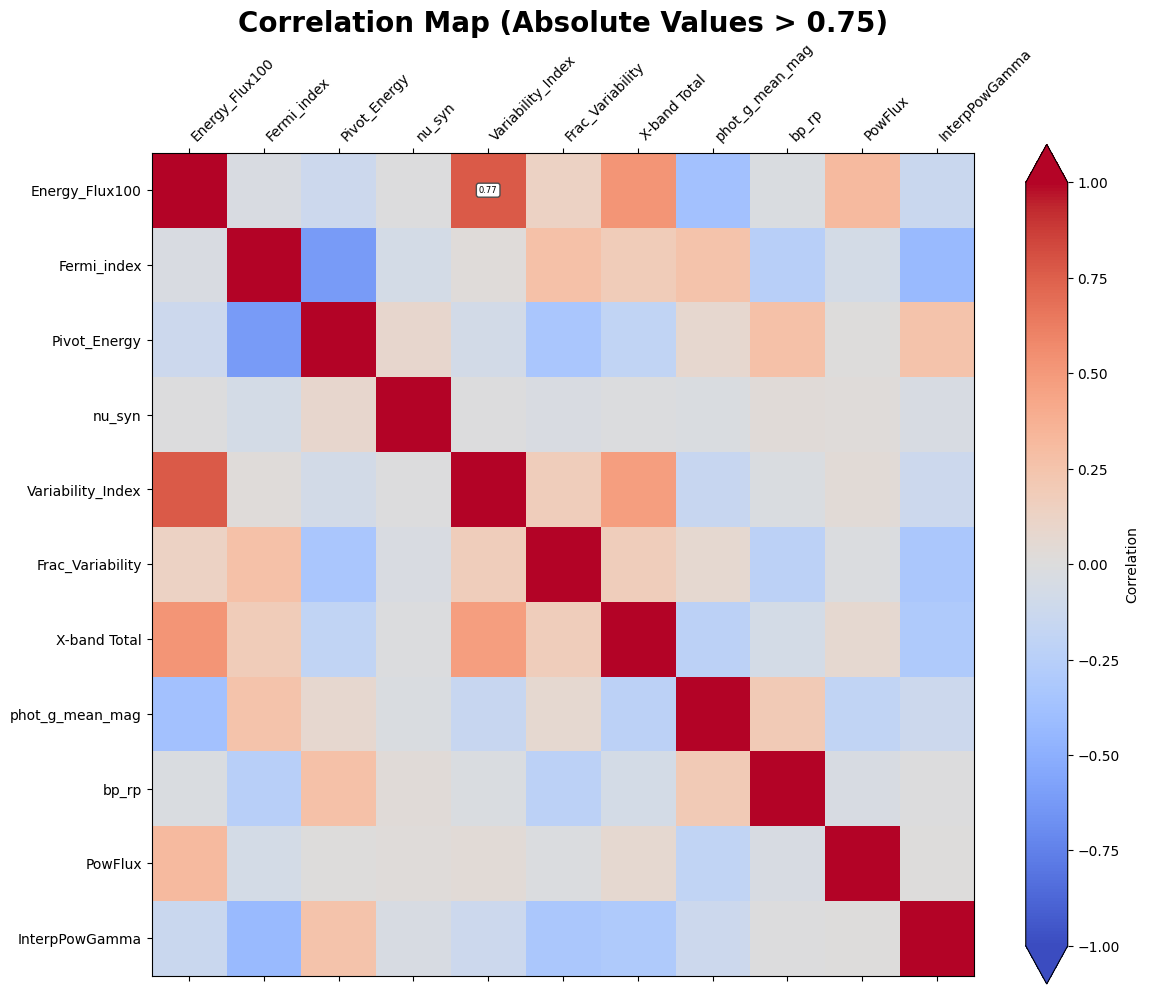

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Mask for correlations above 0.75 or below -0.75
mask = np.triu(np.abs(corr_matrix) >= 0.75, k=1)  # Upper triangle for clarity

fig, ax = plt.subplots(figsize=(12, 10))

# Create heatmap without mask
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Apply mask
#cax.set_bad(color='white')

# Add colorbar
fig.colorbar(cax, label='Correlation', extend='both')

# Add labels for each cell in the heatmap
for (i, j), z in np.ndenumerate(corr_matrix):
    if mask[i, j]:
        ax.text(j, i, f"{z:.2f}", ha='center', va='center', fontsize=6,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45, ha='left')
plt.yticks(rotation=0)
ax.xaxis.set_major_locator(plt.MultipleLocator(1.5))

# Set ticks
ax.set_xticks(np.arange(len(data.iloc[:,:-1].columns)))
ax.set_yticks(np.arange(len(data.iloc[:,:-1].columns)))

# Set tick labels
ax.set_xticklabels(data.iloc[:,:-1].columns)
ax.set_yticklabels(data.iloc[:,:-1].columns)

# Set title
ax.set_title('Correlation Map (Absolute Values > 0.75)', fontweight='bold', fontsize=20)

plt.tight_layout()
plt.show()


## Before Analysis..

In [35]:
useful_col_pred = ["BLL","FSRQ"] # Provide the list here
data_train = data[data.iloc[:,-1].isin(useful_col_pred)]  
data_test = data[~data.iloc[:,-1].isin(useful_col_pred)]
# data_test: Completely separate since we want to predict on this


X = data_train.iloc[:,:-1]
Y = data_train.iloc[:,-1]

X_unknown = data_test.iloc[:,:-1]
Y_unknown = data_test.iloc[:,-1]

## Imputation Via different Methods

In [7]:
#Simple Imputation 

X_columns = X.columns.tolist()           #To get column list
X_simple_median = X.copy()
#To fill empty spaces with mode:
for i in range(len(X_columns)):
    X_simple_median[X_columns[i]] = X_simple_median[X_columns[i]].fillna(X_simple_median[X_columns[i]].median()) 

    

In [77]:
# #Simple Imputation 2

# import scipy
# from scipy import stats,optimize
# import numpy as np

# X_columns = X.columns.tolist()

# def calc_shgo_mode(data, distribution):
#     def objective(x):
#         return 1/distribution.pdf(x)[0]
    
#     bnds = [[min(data), max(data)]]
#     solution = optimize.shgo(objective, bounds= bnds, n=100*len(data))
#     return solution.x[0]

# def calculate_mode(data):
#     ## KDE
#     distribution = stats.gaussian_kde(data)
#     shgo_mode = calc_shgo_mode(data, distribution)
#     return shgo_mode

# def mode_impute(ft):
#     l,b= ft.shape
#     for i in range(b):
#         ar= ft[:,i]
#         temp=ar[np.invert(np.isnan(ar.astype(float)))]
#         m=calculate_mode(temp.astype('float64'))
#         for j in range(l):
#             if np.isnan(ft[j,i]):
#                 ft[j,i]=m
#     return ft


# ft=mode_impute(np.array(X))
# X_simple2 = pd.DataFrame(ft,columns=X_columns)

divide by zero encountered in double_scalars
Values in x were outside bounds during a minimize step, clipping to bounds


In [78]:
# #Initialization maximization with kNN imputation as its input

# import numpy as np
# import pandas as pd
# from sklearn.impute import KNNImputer


# def em_with_knn(data, max_iter=100, tolerance=1e-6, k_neighbors=5):
#     # Convert data to a NumPy array to work with KNN imputer
#     data = np.array(data)
    
#     # Copy the data to avoid modifying the original data
#     imputed_data = data.copy()
    
#     # Find the indices of missing values in the data
#     missing_indices = np.isnan(data)
    
#     # Initialize missing values using KNN imputation
#     knn_imputer = KNNImputer(n_neighbors=k_neighbors)
#     imputed_data[missing_indices] = knn_imputer.fit_transform(data)[missing_indices]
    
#     num_rows, num_cols = data.shape

#     for iteration in range(max_iter):
#         # Expectation step: Estimate the missing values using the current imputed data
#         for i in range(num_rows):
#             for j in range(num_cols):
#                 if np.isnan(data[i, j]):
#                     # Calculate the conditional expectation for the missing value
#                     numerator = np.sum(imputed_data[:, j]) - imputed_data[i, j]
#                     denominator = num_rows - 1
#                     imputed_data[i, j] = numerator / denominator
        
#         # Check for convergence
#         if np.abs(imputed_data[missing_indices] - data[missing_indices]).max() < tolerance:
#             break
    
#     return imputed_data

# x_imputed_init_max = em_with_knn(X, max_iter=100, tolerance=1e-6, k_neighbors=5)


In [79]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# #scaler = MinMaxScaler()
# scaler = StandardScaler()

# # I normalized to mean 0 std 1
# normalized_x_simple1 = scaler.fit_transform(X_simple1) 
# normalized_x_simple2 = scaler.fit_transform(X_simple2) 
# normalized_x_imputed_init_max = scaler.fit_transform(x_imputed_init_max)


In [80]:
# normalized_x_simple1 = pd.DataFrame(normalized_x_simple1,columns=X.columns)
# normalized_x_simple2 = pd.DataFrame(normalized_x_simple2,columns=X.columns)
# normalized_x_imputed_init_max = pd.DataFrame(normalized_x_imputed_init_max,columns=X.columns)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()
normalized_x_median = scaler.fit_transform(X_simple_median)
normalized_x_median = pd.DataFrame(normalized_x_median,columns=X.columns)

normalized_x = scaler.fit_transform(X)
normalized_x = pd.DataFrame(normalized_x,columns=X.columns)

## Unsupervised ML 

In [9]:
from sklearn.decomposition import PCA

def PCA_func(X,Y):
    pca = PCA(n_components=2)  
    pca_result = pca.fit_transform(X)

    # Access the principal components
    principal_components = pca.components_

    # Access the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_    

    categories = ['BLL', 'FSRQ']

    # Create a dictionary to map categories to colors
    category_colors = {'BLL': 'blue', 'FSRQ': 'gold'}

    # Create a scatter plot with color-coded categories
    for category in categories:
        category_mask = Y == category
        plt.scatter(pca_result[category_mask, 0], pca_result[category_mask, 1],marker='.',
                    color=category_colors[category], label=category)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Scatter Plot')
    plt.legend()
    plt.grid()
    plt.show()    
    


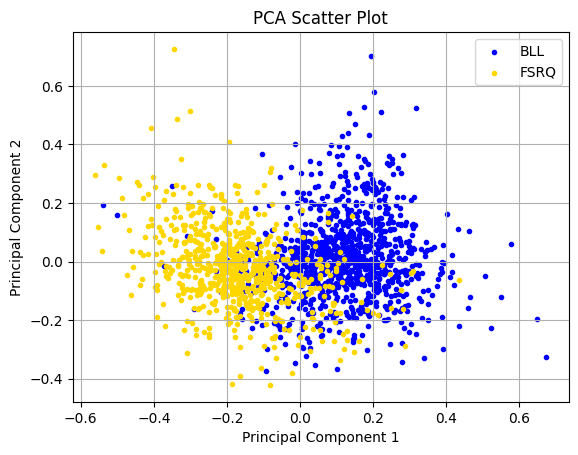

In [10]:
PCA_func(normalized_x_median,Y)

## Supervised ML

In [18]:
import flaml
import shap
#import eli5
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from matplotlib.colors import Normalize
from sklearn.impute import SimpleImputer
#from eli5.sklearn import PermutationImportance
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [19]:
def Basic_ML_part(Y_test, Y_pred,class_labels,name):

    label_encoder = preprocessing.LabelEncoder()  
    Y_test_encoded = label_encoder.fit_transform(Y_test)
    inv_Y_pred = label_encoder.inverse_transform(Y_pred)
    
    accuracy = accuracy_score(Y_test_encoded, Y_pred)
    print(f"Accuracy of model on testing data: {accuracy:.4f}")
    
    conf_matrix = np.array(confusion_matrix(Y_test, inv_Y_pred))
    report = classification_report(Y_test, inv_Y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", report)
    
    cm_percentage = (conf_matrix / conf_matrix.sum(axis=1, keepdims=True))*100
    # Labels for the classes
    #class_labels = ['BLL', 'FSRQ']

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Define a normalization to control color intensity
    norm = Normalize(vmin=cm_percentage.min(), vmax=cm_percentage.max())

    # Plot the heatmap
    cax = ax.matshow(cm_percentage, cmap='Blues', norm=norm)

    # Add colorbar
    cbar = plt.colorbar(cax)

    # Set tick labels and positions
    ax.set_xticks(np.arange(len(class_labels)))
    ax.set_yticks(np.arange(len(class_labels)))
    ax.set_xticklabels(class_labels)
    ax.set_yticklabels(class_labels)

    # Display the mean values and standard deviations as text in each cell
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            text = f'{cm_percentage[i, j]:.3f}%'
            if i == j:  # Set text color to white for diagonal elements
                ax.text(j, i, text, ha='center', va='center', color='white')
            else:
                ax.text(j, i, text, ha='center', va='center', color='black')

    # Set labels for x and y axes
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')

    plt.suptitle(f"Confusion Matrix for {name}", y=1.1, fontsize=13)
    plt.subplots_adjust(top=1)

    # Display the plot
    plt.show()

In [24]:
#AutoML
#X and Y should be dataframe
import logging
from sklearn import preprocessing
from flaml import logger
#from flaml import AutoML

def ML_analysis(X,Y,model,t,k_fold):
    logger.setLevel(logging.WARNING)   
    #logging.getLogger('flaml').setLevel(logging.WARNING)  # Not suppressing idk
    cv = StratifiedKFold(n_splits=k_fold, shuffle=True)  
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    label_encoder = preprocessing.LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(Y_train)

    # Calculate class weights
    class_counts = np.bincount(y_train_encoded)
    total_samples = len(y_train_encoded)
    class_weights = total_samples / (len(class_counts) * class_counts)
    class_weights = {0: class_weights[0], 1: class_weights[1]}
    
    #automl = AutoML()
    automl = flaml.AutoML(
        task="classification",
        metric="roc_auc",
        estimator_list = model,
        time_budget=t,
        class_weight= class_weights,  
        early_stop=True,
        verbose = 0,
        #ensemble=True,
        cv=cv)


    automl.fit(X_train = X_train,y_train = Y_train)
    
    print('\n \n Best ML leaner:', automl.best_estimator)
    print('Best hyperparmeter config:', automl.best_config)
    print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))

    # Feauture Importance
    feature_importances = automl.model.estimator.feature_importances_ 
    x_columns = X.columns
    normalized_importances = feature_importances / np.sum(feature_importances) * 100

    # Sort the features by importance
    sorted_indices = np.argsort(normalized_importances)

    # Plot feature importances with adjusted spacing
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(x_columns)), normalized_importances[sorted_indices])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance Plot for {automl.best_estimator} Model')

    # Set the y-axis labels to feature names with adjusted spacing
    plt.yticks(range(len(x_columns)), [x_columns[i] for i in sorted_indices])
    plt.grid()
    plt.show()
    

    # Retrieve the best model
    best_model = automl.model.estimator

    # Create a SHAP explainer
    explainer = shap.Explainer(best_model)
    label_encoder = preprocessing.LabelEncoder()  
    Y_test_encoded = label_encoder.fit_transform(Y_test) 
    
    #Permutation Importance

    # perm = PermutationImportance(best_model, random_state=1457).fit(X_test, Y_test_encoded)
    # w = eli5.show_weights(perm, feature_names = x_columns.tolist())
    # result = pd.read_html(w.data)[0]
    # print(result)
    
    perm_importance = permutation_importance(best_model, X_test, Y_test_encoded, n_repeats=30, random_state=15)

    # Get feature importances and their indices
    feature_importances = perm_importance.importances_mean
    feature_indices = np.argsort(feature_importances)[::-1]

    # Print or visualize feature importances
    for idx in feature_indices:
        print(f"Feature: {X.columns[idx]}, Importance: {feature_importances[idx]:.5f}")
    
    #General Properties of ML 
    Y_pred = best_model.predict(X_test)
    
    # Labels for the classes
    class_labels = ['BLL', 'FSRQ']
    #Basic_ML_part(Y_test, Y_pred,class_labels,model[0])
    Basic_ML_part(Y_test, Y_pred,class_labels,automl.best_estimator)
    return [automl.best_estimator,automl.best_config,1-automl.best_loss]    


In [13]:
#To study effect of not using radio data

normalized_x_median1 = normalized_x_median.drop("X-band Total", axis=1)
normalized_x1 = normalized_x.drop("X-band Total", axis=1)

Now we will do it for normalized X with and without "X-band Total" column. Similarly after imputation we will again do the same.

Normalized X trained on lgbm


 
 Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 19, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.40106881032023267, 'log_max_bin': 10, 'colsample_bytree': 0.8591464191448509, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.14586454205299842}
Best accuracy on validation data: 0.9694


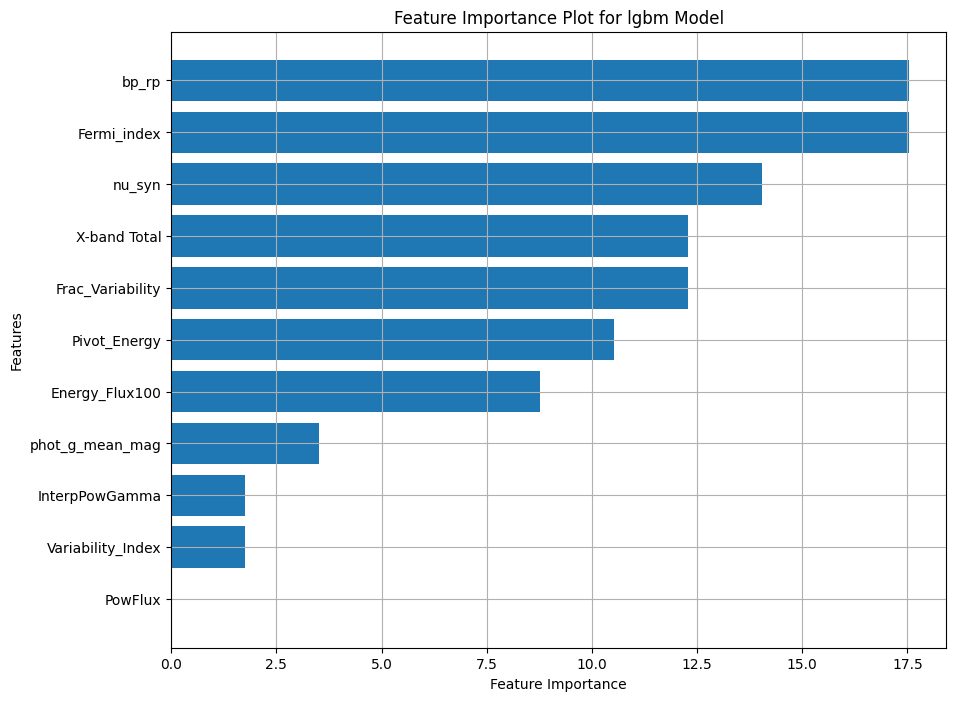

Feature: Fermi_index, Importance: 0.05868
Feature: Pivot_Energy, Importance: 0.04848
Feature: nu_syn, Importance: 0.04215
Feature: bp_rp, Importance: 0.03287
Feature: Frac_Variability, Importance: 0.02250
Feature: phot_g_mean_mag, Importance: 0.02029
Feature: X-band Total, Importance: 0.00983
Feature: Variability_Index, Importance: 0.00184
Feature: PowFlux, Importance: 0.00000
Feature: Energy_Flux100, Importance: -0.00707
Feature: InterpPowGamma, Importance: -0.00891
Accuracy of model on testing data: 0.8485
Confusion Matrix:
 [[169  45]
 [ 10 139]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.94      0.79      0.86       214
        FSRQ       0.76      0.93      0.83       149

    accuracy                           0.85       363
   macro avg       0.85      0.86      0.85       363
weighted avg       0.87      0.85      0.85       363



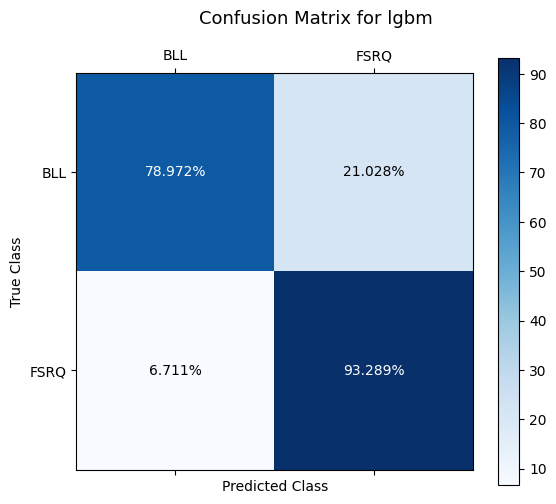

Normalized X without X-band Total trained on lgbm


 
 Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 8, 'num_leaves': 4, 'min_child_samples': 9, 'learning_rate': 0.7260594590615893, 'log_max_bin': 9, 'colsample_bytree': 0.9285002286474459, 'reg_alpha': 0.0036840681931986645, 'reg_lambda': 0.7532480505730402}
Best accuracy on validation data: 0.9626


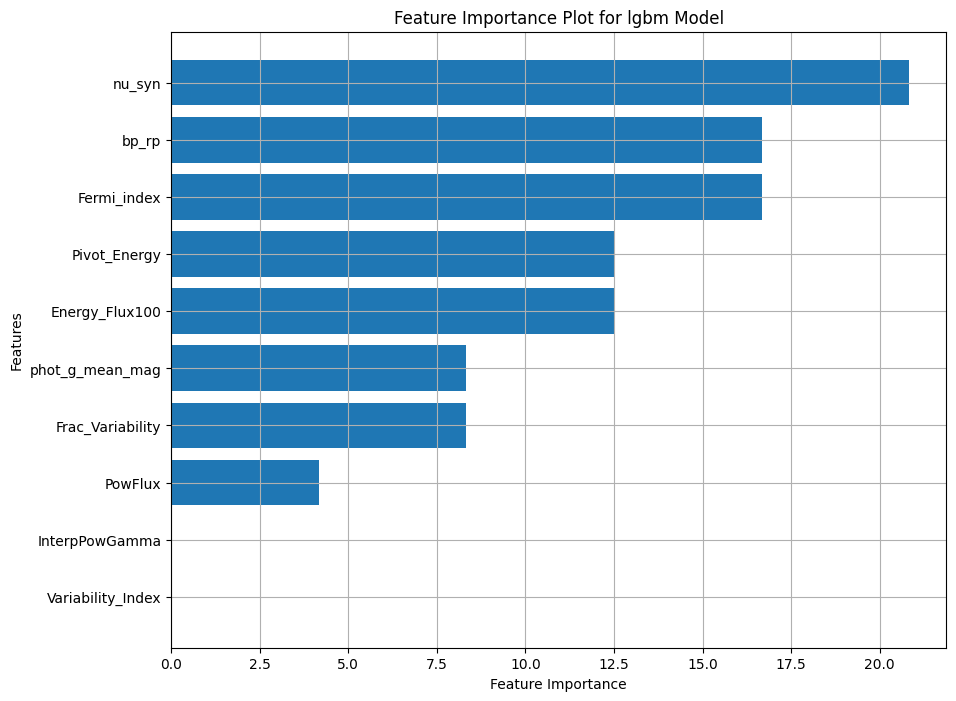

Feature: nu_syn, Importance: 0.04527
Feature: Fermi_index, Importance: 0.04224
Feature: Pivot_Energy, Importance: 0.03462
Feature: bp_rp, Importance: 0.01506
Feature: Frac_Variability, Importance: 0.01423
Feature: phot_g_mean_mag, Importance: 0.00808
Feature: InterpPowGamma, Importance: 0.00000
Feature: Variability_Index, Importance: 0.00000
Feature: PowFlux, Importance: -0.00588
Feature: Energy_Flux100, Importance: -0.02250
Accuracy of model on testing data: 0.8320
Confusion Matrix:
 [[167  47]
 [ 14 135]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.92      0.78      0.85       214
        FSRQ       0.74      0.91      0.82       149

    accuracy                           0.83       363
   macro avg       0.83      0.84      0.83       363
weighted avg       0.85      0.83      0.83       363



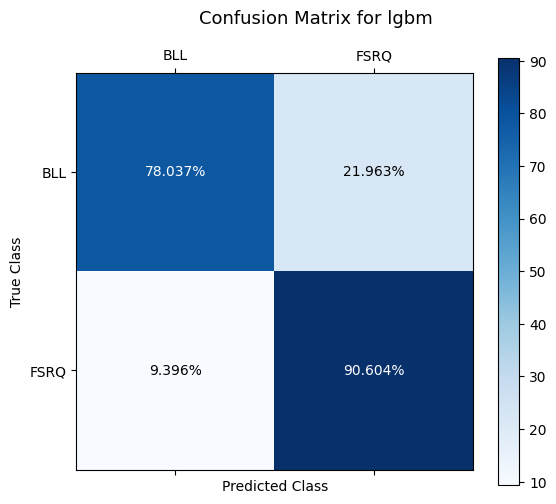

Normalized median imputed X trained on lgbm


 
 Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 19, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.40106881032023267, 'log_max_bin': 10, 'colsample_bytree': 0.8591464191448509, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.14586454205299842}
Best accuracy on validation data: 0.9696


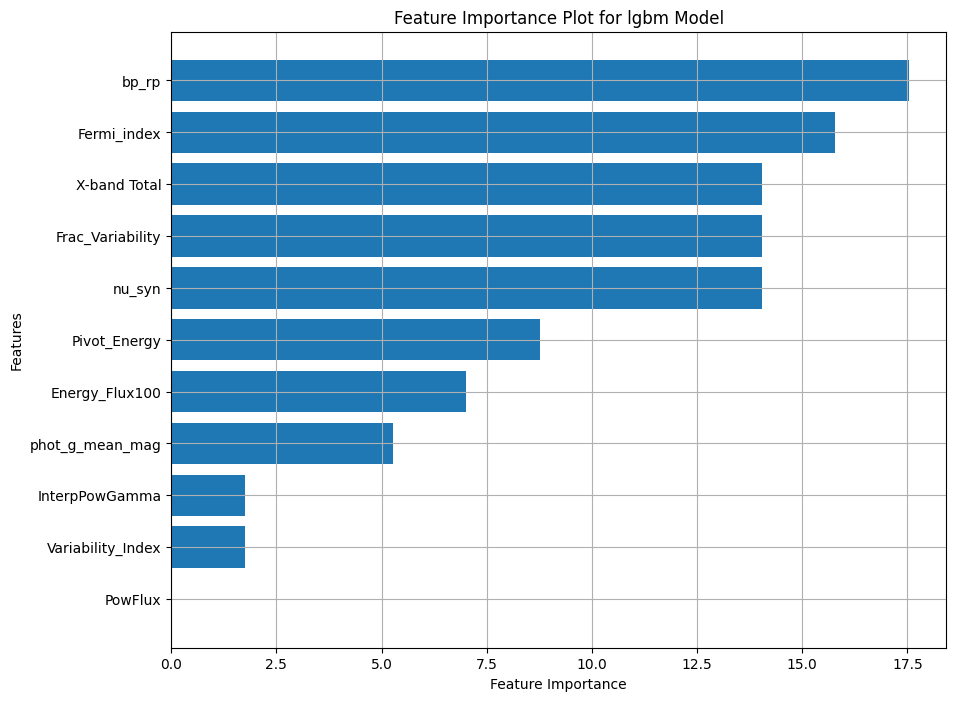

Feature: Fermi_index, Importance: 0.04848
Feature: bp_rp, Importance: 0.03095
Feature: Pivot_Energy, Importance: 0.02828
Feature: X-band Total, Importance: 0.01552
Feature: Frac_Variability, Importance: 0.01304
Feature: nu_syn, Importance: 0.01093
Feature: Energy_Flux100, Importance: 0.00239
Feature: InterpPowGamma, Importance: 0.00193
Feature: PowFlux, Importance: 0.00000
Feature: Variability_Index, Importance: -0.00395
Feature: phot_g_mean_mag, Importance: -0.00459
Accuracy of model on testing data: 0.8898
Confusion Matrix:
 [[186  28]
 [ 12 137]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.94      0.87      0.90       214
        FSRQ       0.83      0.92      0.87       149

    accuracy                           0.89       363
   macro avg       0.88      0.89      0.89       363
weighted avg       0.89      0.89      0.89       363



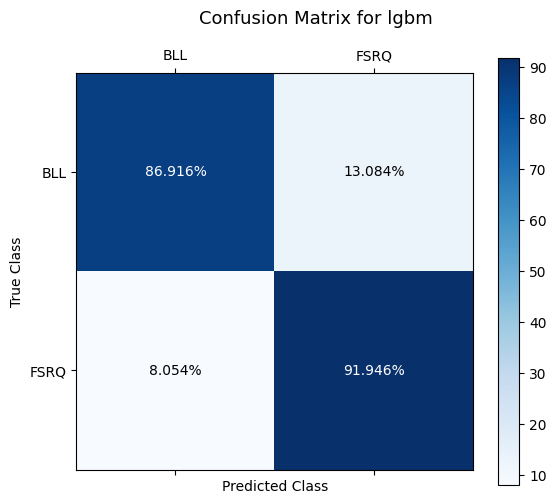

Normalized median imputed X without X-band Total trained on lgbm


 
 Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 8, 'num_leaves': 4, 'min_child_samples': 9, 'learning_rate': 0.7260594590615893, 'log_max_bin': 9, 'colsample_bytree': 0.9285002286474459, 'reg_alpha': 0.0036840681931986645, 'reg_lambda': 0.7532480505730402}
Best accuracy on validation data: 0.9626


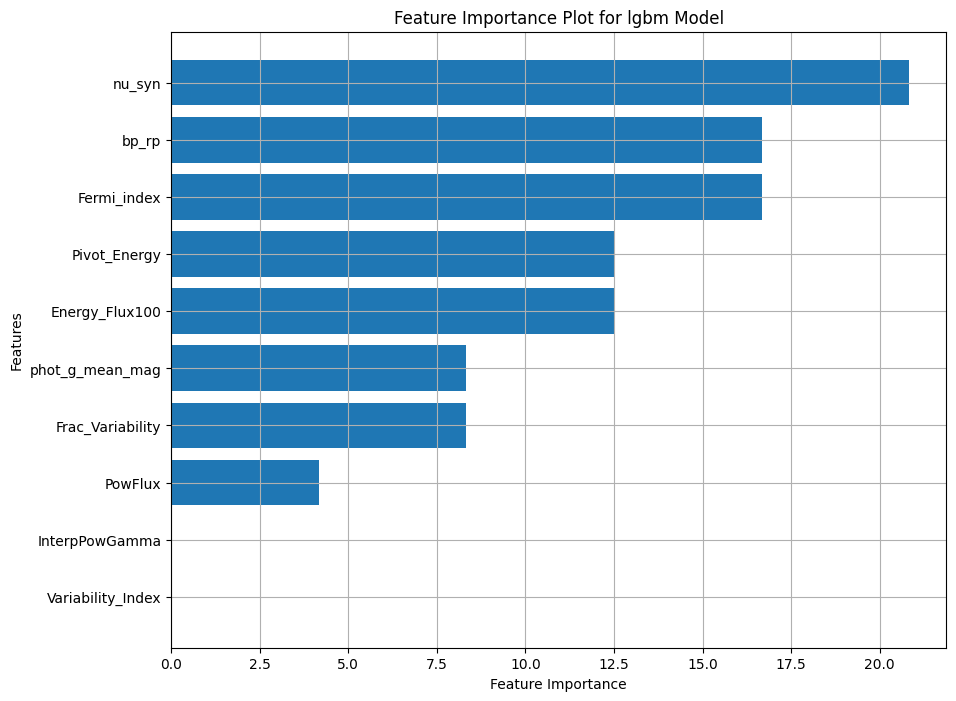

Feature: nu_syn, Importance: 0.05363
Feature: Fermi_index, Importance: 0.05317
Feature: bp_rp, Importance: 0.04123
Feature: Pivot_Energy, Importance: 0.03912
Feature: Frac_Variability, Importance: 0.01644
Feature: phot_g_mean_mag, Importance: 0.00358
Feature: PowFlux, Importance: 0.00055
Feature: InterpPowGamma, Importance: 0.00000
Feature: Variability_Index, Importance: 0.00000
Feature: Energy_Flux100, Importance: -0.00018
Accuracy of model on testing data: 0.8898
Confusion Matrix:
 [[192  22]
 [ 18 131]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.91      0.90      0.91       214
        FSRQ       0.86      0.88      0.87       149

    accuracy                           0.89       363
   macro avg       0.89      0.89      0.89       363
weighted avg       0.89      0.89      0.89       363



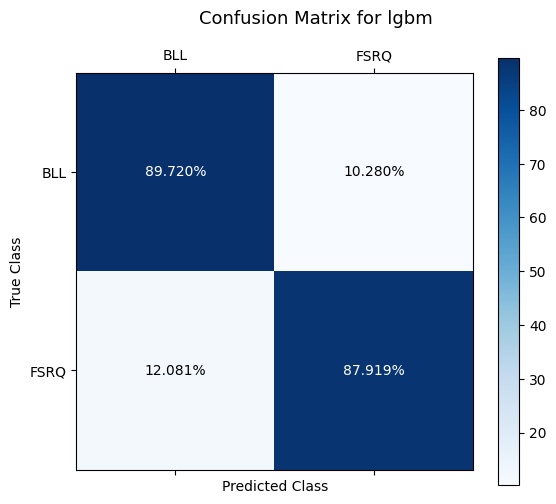

Normalized X trained on rf


 
 Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 167, 'max_features': 0.26954521799631737, 'max_leaves': 45, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9726


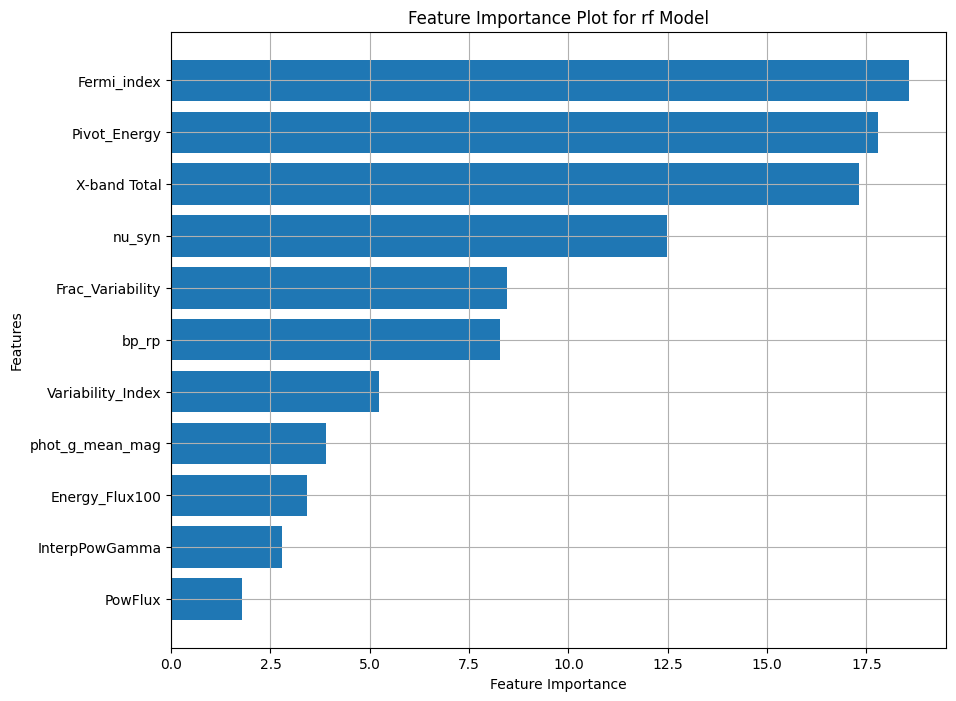

Feature: Fermi_index, Importance: 0.02782
Feature: bp_rp, Importance: 0.02415
Feature: Pivot_Energy, Importance: 0.02259
Feature: X-band Total, Importance: 0.00762
Feature: Frac_Variability, Importance: 0.00707
Feature: Variability_Index, Importance: 0.00542
Feature: nu_syn, Importance: -0.00156
Feature: InterpPowGamma, Importance: -0.00174
Feature: Energy_Flux100, Importance: -0.00193
Feature: phot_g_mean_mag, Importance: -0.00202
Feature: PowFlux, Importance: -0.00505
Accuracy of model on testing data: 0.8926
Confusion Matrix:
 [[187  27]
 [ 12 137]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.94      0.87      0.91       214
        FSRQ       0.84      0.92      0.88       149

    accuracy                           0.89       363
   macro avg       0.89      0.90      0.89       363
weighted avg       0.90      0.89      0.89       363



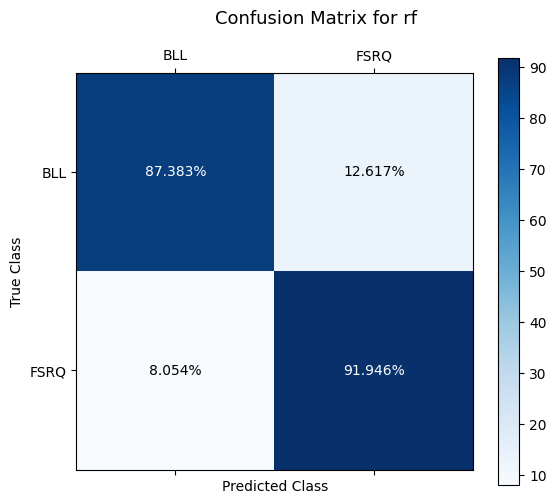

Normalized X without X-band Total trained on rf


 
 Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 110, 'max_features': 0.273275554619745, 'max_leaves': 55, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9689


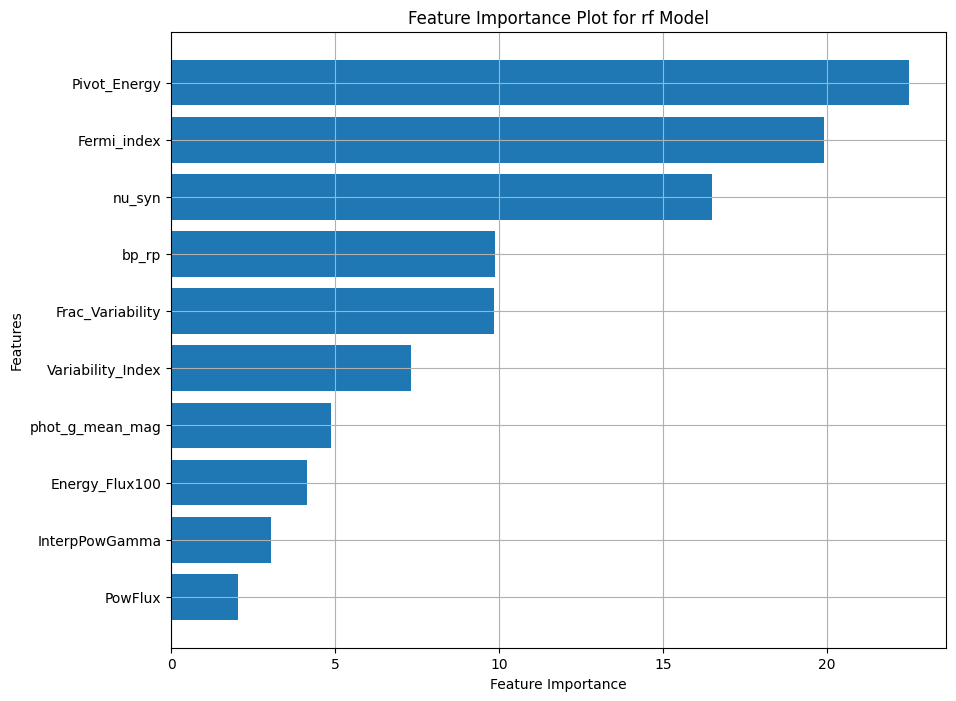

Feature: Pivot_Energy, Importance: 0.05730
Feature: Fermi_index, Importance: 0.05565
Feature: bp_rp, Importance: 0.04894
Feature: nu_syn, Importance: 0.02966
Feature: phot_g_mean_mag, Importance: 0.02112
Feature: Frac_Variability, Importance: 0.01726
Feature: Variability_Index, Importance: 0.01341
Feature: InterpPowGamma, Importance: 0.01028
Feature: Energy_Flux100, Importance: 0.00983
Feature: PowFlux, Importance: 0.00230
Accuracy of model on testing data: 0.9118
Confusion Matrix:
 [[196  18]
 [ 14 135]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.93      0.92      0.92       214
        FSRQ       0.88      0.91      0.89       149

    accuracy                           0.91       363
   macro avg       0.91      0.91      0.91       363
weighted avg       0.91      0.91      0.91       363



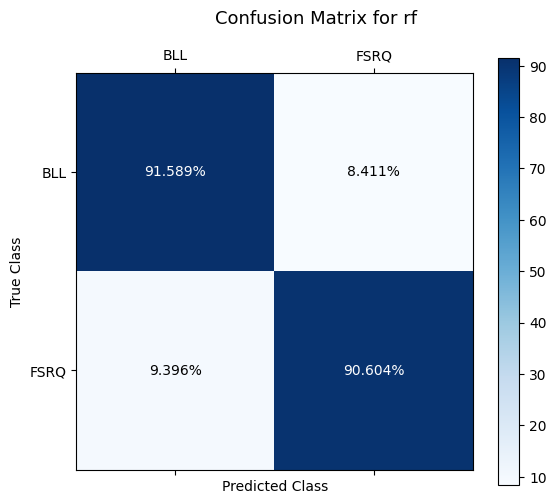

Normalized median imputed X trained on rf


 
 Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 472, 'max_features': 0.3025695018166374, 'max_leaves': 35, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9727


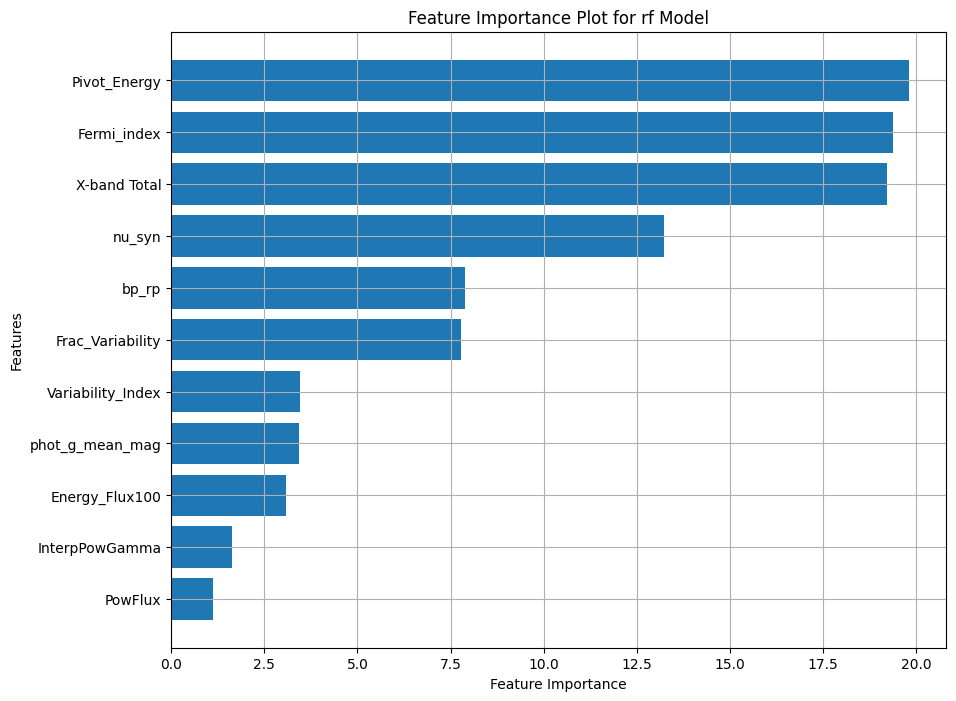

Feature: Fermi_index, Importance: 0.03737
Feature: Pivot_Energy, Importance: 0.02782
Feature: bp_rp, Importance: 0.02452
Feature: X-band Total, Importance: 0.01938
Feature: Frac_Variability, Importance: 0.01322
Feature: InterpPowGamma, Importance: 0.00643
Feature: Variability_Index, Importance: 0.00606
Feature: nu_syn, Importance: 0.00505
Feature: PowFlux, Importance: 0.00331
Feature: phot_g_mean_mag, Importance: 0.00110
Feature: Energy_Flux100, Importance: -0.00129
Accuracy of model on testing data: 0.9008
Confusion Matrix:
 [[191  23]
 [ 13 136]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.94      0.89      0.91       214
        FSRQ       0.86      0.91      0.88       149

    accuracy                           0.90       363
   macro avg       0.90      0.90      0.90       363
weighted avg       0.90      0.90      0.90       363



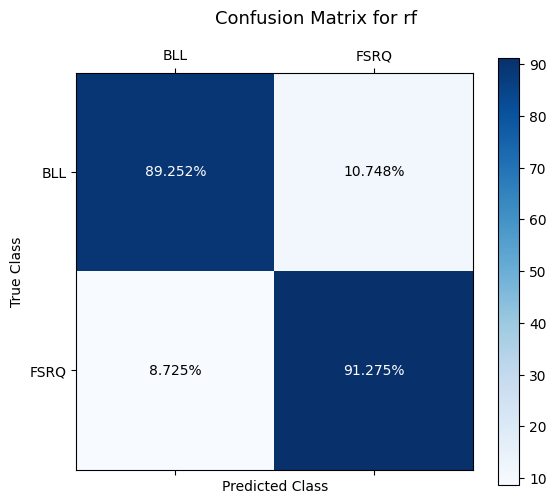

Normalized median imputed X without X-band Total trained on rf


 
 Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 19, 'max_features': 0.21223340536931126, 'max_leaves': 34, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9673


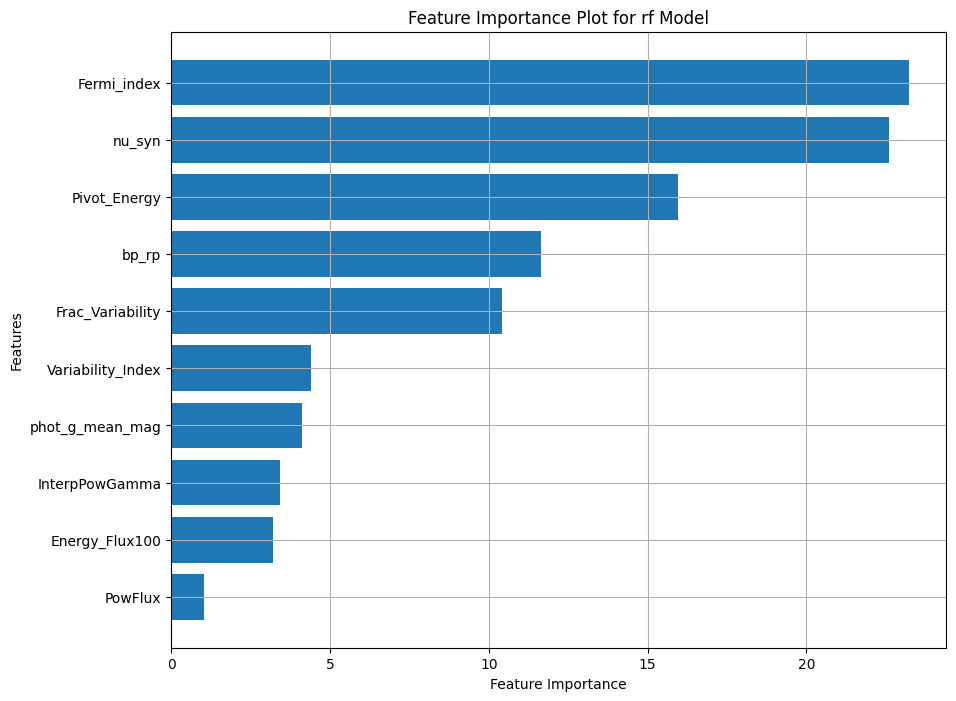

Feature: bp_rp, Importance: 0.05335
Feature: Fermi_index, Importance: 0.04940
Feature: nu_syn, Importance: 0.02103
Feature: Frac_Variability, Importance: 0.00735
Feature: Pivot_Energy, Importance: 0.00542
Feature: PowFlux, Importance: 0.00395
Feature: phot_g_mean_mag, Importance: 0.00395
Feature: InterpPowGamma, Importance: -0.00046
Feature: Energy_Flux100, Importance: -0.00542
Feature: Variability_Index, Importance: -0.00790
Accuracy of model on testing data: 0.8871
Confusion Matrix:
 [[191  23]
 [ 18 131]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.91      0.89      0.90       214
        FSRQ       0.85      0.88      0.86       149

    accuracy                           0.89       363
   macro avg       0.88      0.89      0.88       363
weighted avg       0.89      0.89      0.89       363



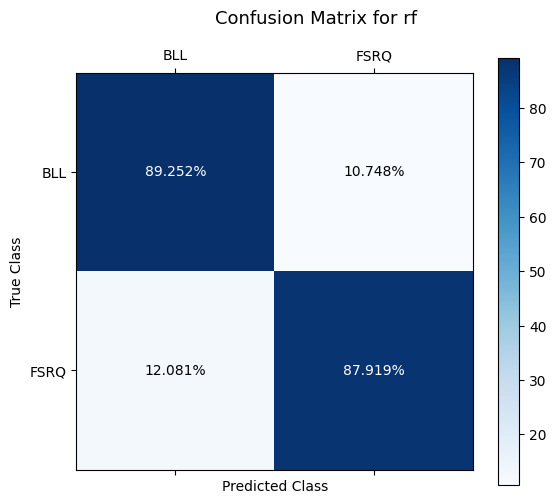

Normalized X trained on xgboost


 
 Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 8, 'max_leaves': 5, 'min_child_weight': 5.909231502320289, 'learning_rate': 0.38946718731417634, 'subsample': 0.8894434216129232, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0013605736901132325, 'reg_lambda': 0.1222158118565165}
Best accuracy on validation data: 0.9658


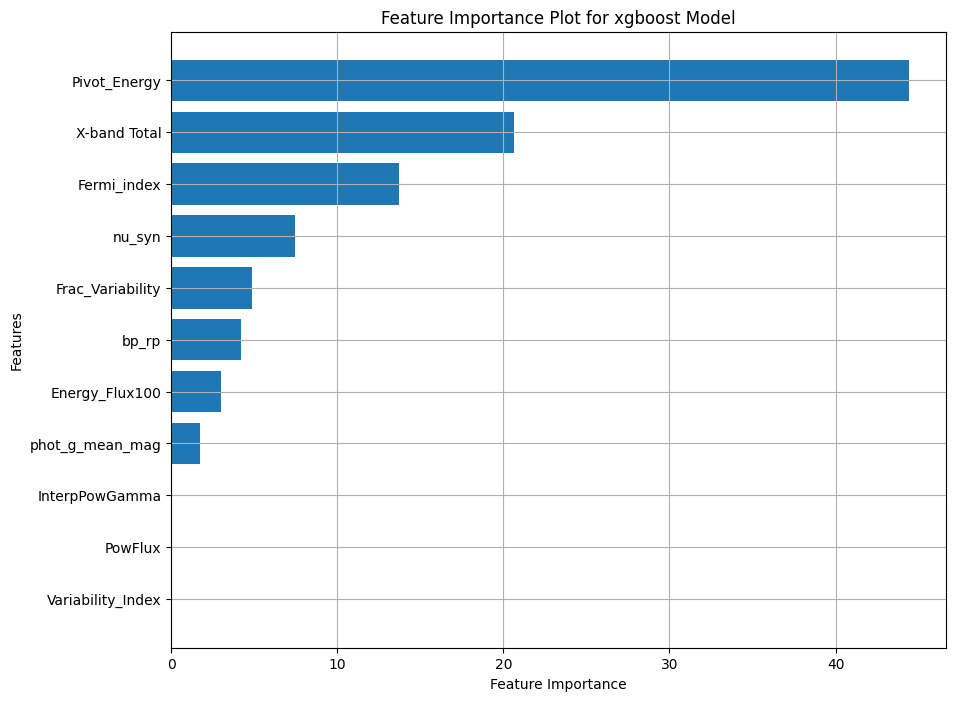

Feature: Fermi_index, Importance: 0.06263
Feature: bp_rp, Importance: 0.03039
Feature: nu_syn, Importance: 0.02700
Feature: X-band Total, Importance: 0.02296
Feature: Pivot_Energy, Importance: 0.01671
Feature: Frac_Variability, Importance: 0.00946
Feature: Energy_Flux100, Importance: 0.00312
Feature: phot_g_mean_mag, Importance: 0.00064
Feature: InterpPowGamma, Importance: 0.00000
Feature: PowFlux, Importance: 0.00000
Feature: Variability_Index, Importance: 0.00000
Accuracy of model on testing data: 0.8815
Confusion Matrix:
 [[192  22]
 [ 21 128]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.90      0.90      0.90       214
        FSRQ       0.85      0.86      0.86       149

    accuracy                           0.88       363
   macro avg       0.88      0.88      0.88       363
weighted avg       0.88      0.88      0.88       363



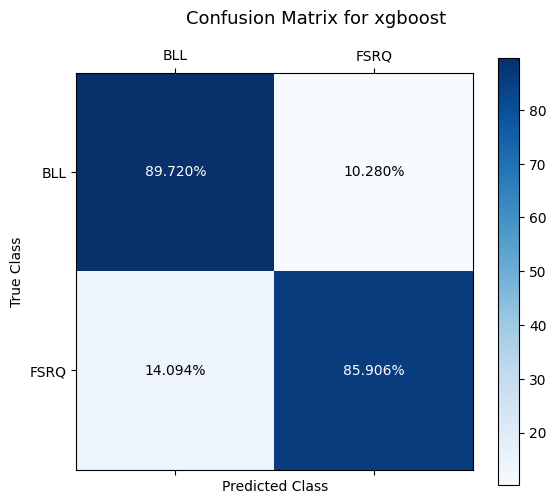

Normalized X without X-band Total trained on xgboost


 
 Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 5, 'max_leaves': 5, 'min_child_weight': 2.9012226967254837, 'learning_rate': 0.38946718731417634, 'subsample': 0.797408126901465, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.027353460692477304}
Best accuracy on validation data: 0.957


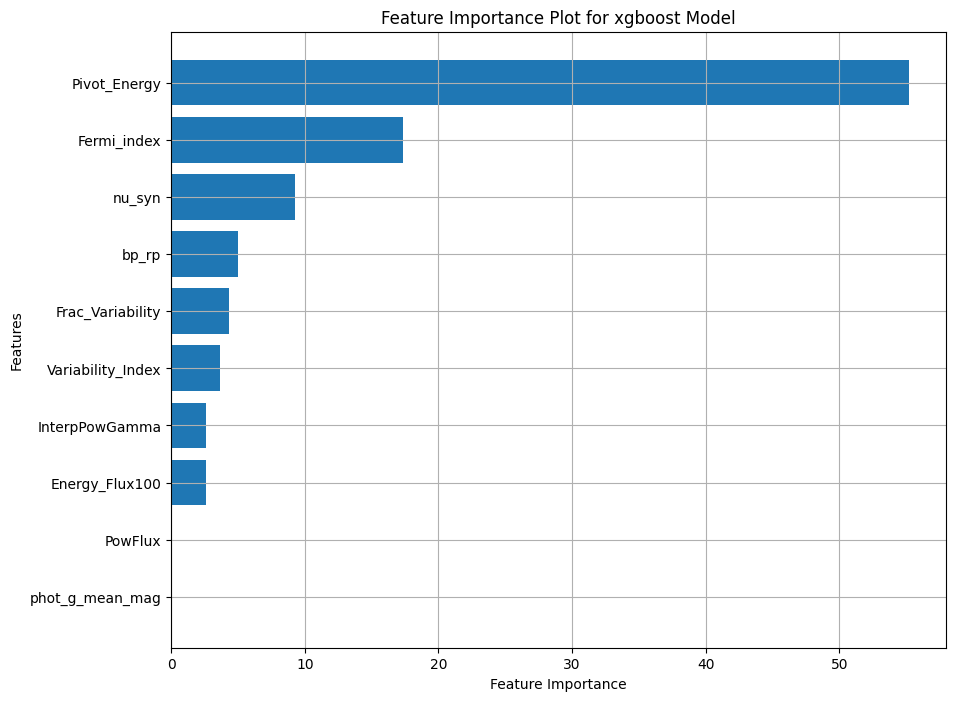

Feature: Fermi_index, Importance: 0.06529
Feature: bp_rp, Importance: 0.04187
Feature: nu_syn, Importance: 0.03719
Feature: Pivot_Energy, Importance: 0.02002
Feature: Frac_Variability, Importance: 0.00395
Feature: InterpPowGamma, Importance: 0.00165
Feature: Variability_Index, Importance: 0.00092
Feature: PowFlux, Importance: 0.00000
Feature: phot_g_mean_mag, Importance: 0.00000
Feature: Energy_Flux100, Importance: -0.00422
Accuracy of model on testing data: 0.8788
Confusion Matrix:
 [[189  25]
 [ 19 130]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.91      0.88      0.90       214
        FSRQ       0.84      0.87      0.86       149

    accuracy                           0.88       363
   macro avg       0.87      0.88      0.88       363
weighted avg       0.88      0.88      0.88       363



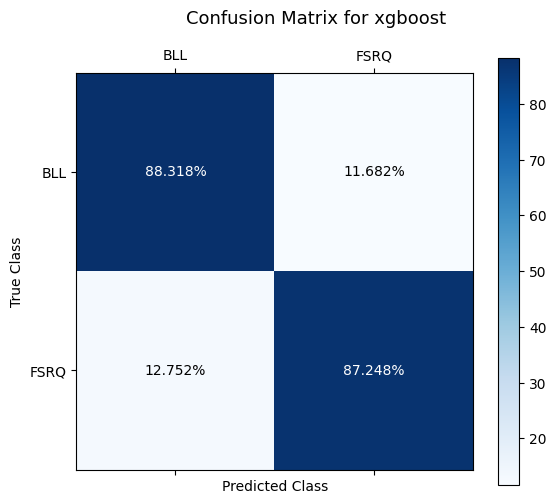

Normalized median imputed X trained on xgboost


 
 Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 8, 'max_leaves': 4, 'min_child_weight': 5.909231502320296, 'learning_rate': 0.8210689282647788, 'subsample': 0.8894434216129232, 'colsample_bylevel': 0.9722620955509288, 'colsample_bytree': 1.0, 'reg_alpha': 0.0013605736901132327, 'reg_lambda': 0.1222158118565166}
Best accuracy on validation data: 0.9624


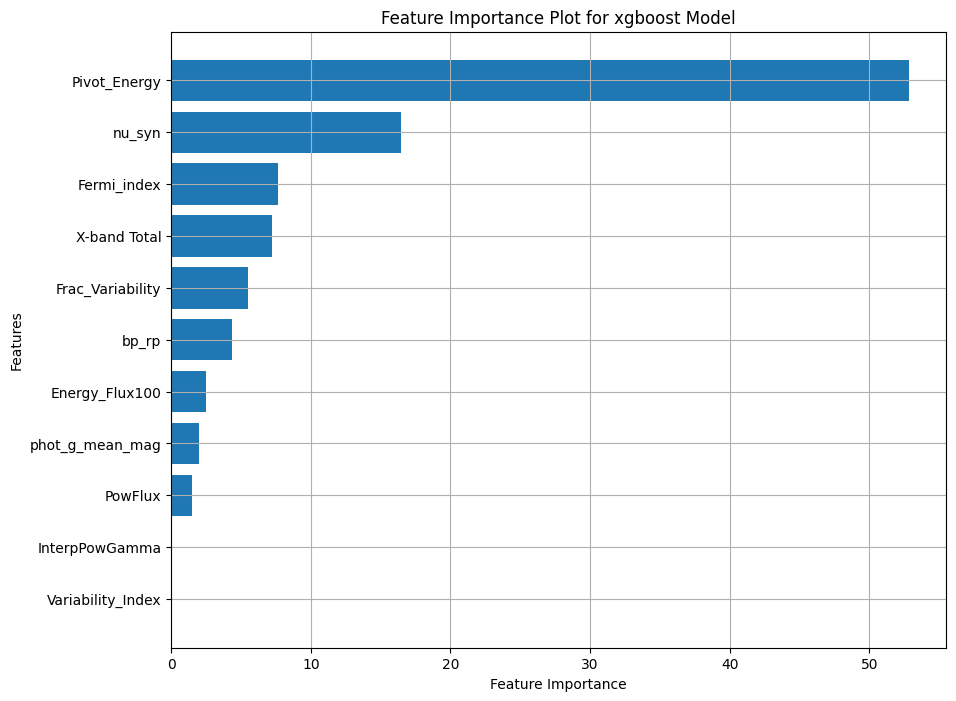

Feature: X-band Total, Importance: 0.06235
Feature: Fermi_index, Importance: 0.04481
Feature: bp_rp, Importance: 0.02388
Feature: Pivot_Energy, Importance: 0.01892
Feature: nu_syn, Importance: 0.00973
Feature: Frac_Variability, Importance: 0.00597
Feature: PowFlux, Importance: 0.00184
Feature: InterpPowGamma, Importance: 0.00000
Feature: Variability_Index, Importance: 0.00000
Feature: phot_g_mean_mag, Importance: -0.00367
Feature: Energy_Flux100, Importance: -0.01249
Accuracy of model on testing data: 0.8705
Confusion Matrix:
 [[186  28]
 [ 19 130]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.91      0.87      0.89       214
        FSRQ       0.82      0.87      0.85       149

    accuracy                           0.87       363
   macro avg       0.87      0.87      0.87       363
weighted avg       0.87      0.87      0.87       363



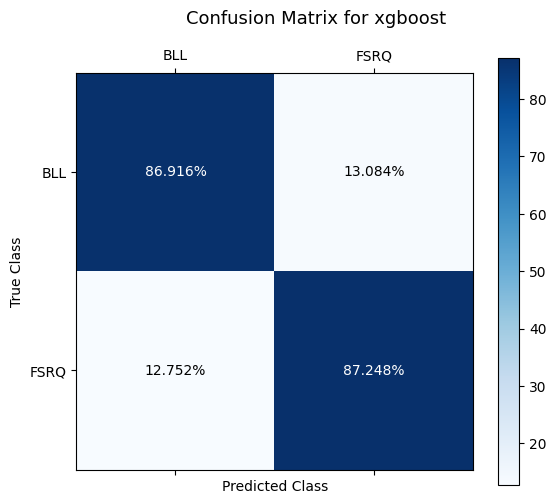

Normalized median imputed X without X-band Total trained on xgboost


 
 Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 8, 'max_leaves': 13, 'min_child_weight': 21.41793057785537, 'learning_rate': 0.30422128128989195, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.8481188761562112, 'reg_alpha': 0.00891372923313011, 'reg_lambda': 0.047790033160727705}
Best accuracy on validation data: 0.9616


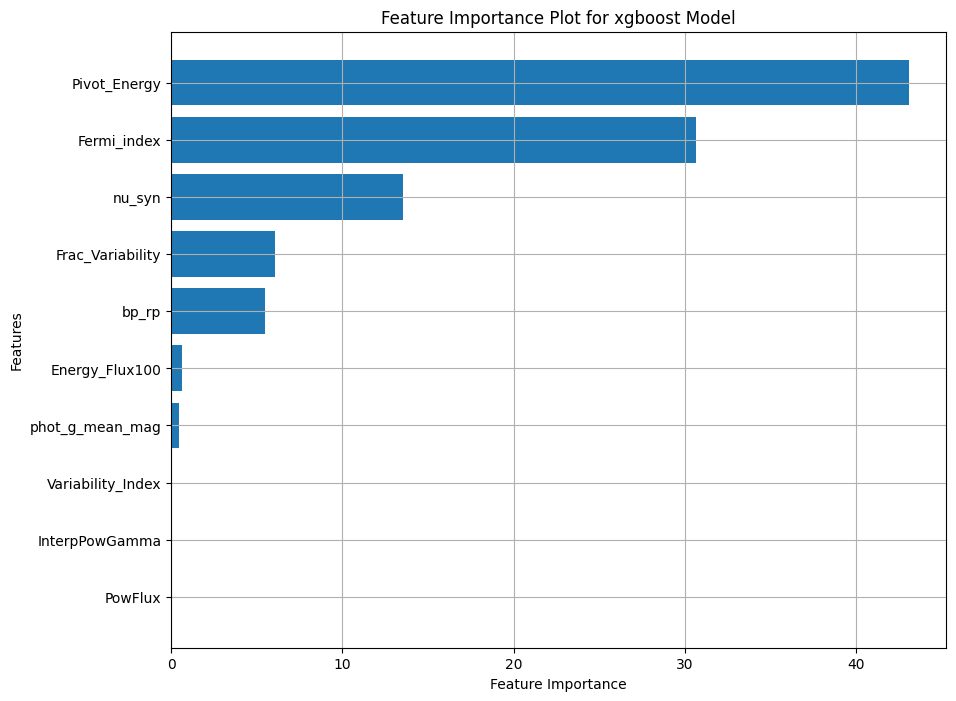

Feature: Fermi_index, Importance: 0.06657
Feature: nu_syn, Importance: 0.05629
Feature: bp_rp, Importance: 0.04628
Feature: Pivot_Energy, Importance: 0.03774
Feature: Frac_Variability, Importance: 0.01194
Feature: phot_g_mean_mag, Importance: 0.00230
Feature: InterpPowGamma, Importance: 0.00000
Feature: PowFlux, Importance: 0.00000
Feature: Variability_Index, Importance: 0.00000
Feature: Energy_Flux100, Importance: 0.00000
Accuracy of model on testing data: 0.9063
Confusion Matrix:
 [[195  19]
 [ 15 134]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.93      0.91      0.92       214
        FSRQ       0.88      0.90      0.89       149

    accuracy                           0.91       363
   macro avg       0.90      0.91      0.90       363
weighted avg       0.91      0.91      0.91       363



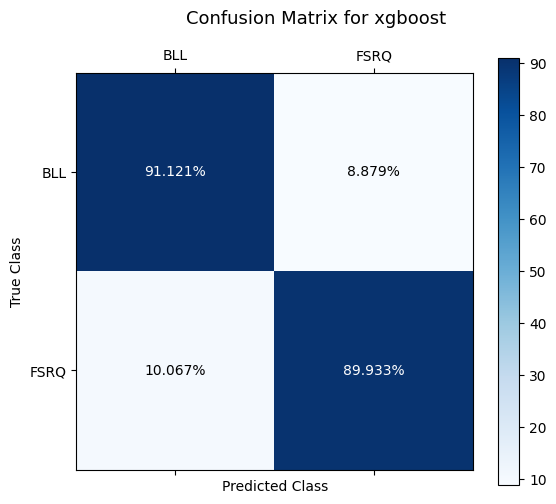

In [27]:
list_of_X = [normalized_x,normalized_x1,normalized_x_median,normalized_x_median1] 
list_of_methods_X = ["Normalized X","Normalized X without X-band Total",
                     "Normalized median imputed X","Normalized median imputed X without X-band Total"]
t = 100
k_fold = 5
model_list = ['lgbm','rf','xgboost']
for model in model_list:
    for i in range(len(list_of_X)):
        print(list_of_methods_X[i]+" trained on "+model+"\n")
        ML_analysis(list_of_X[i],Y,[model],t,k_fold)


 
 Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 77, 'max_features': 0.351400033974538, 'max_leaves': 31, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9722


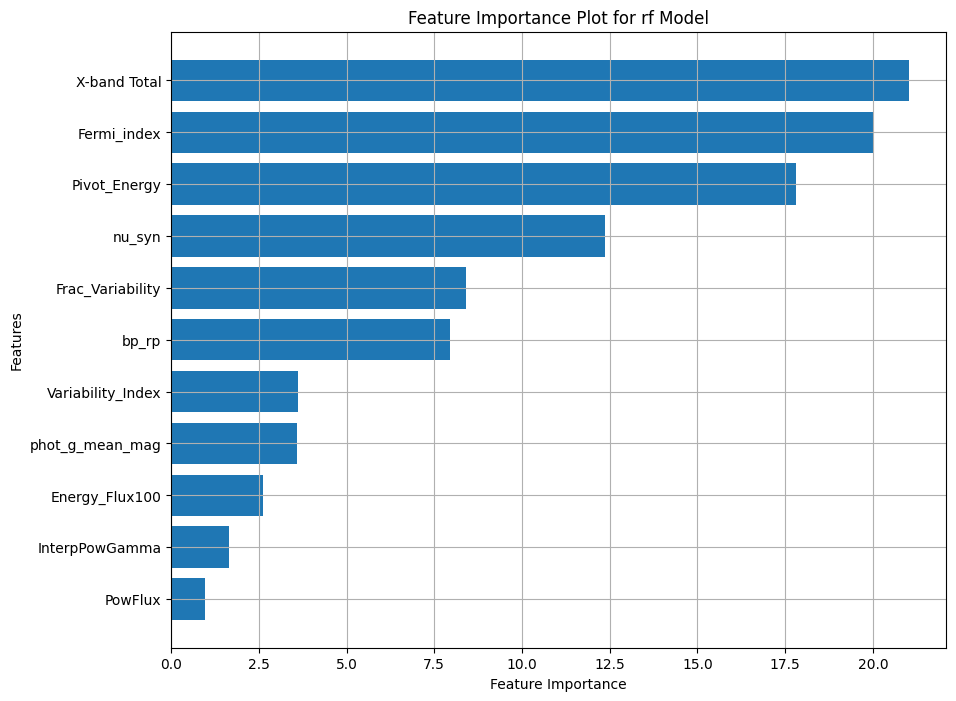

Feature: Fermi_index, Importance: 0.02516
Feature: X-band Total, Importance: 0.01607
Feature: Pivot_Energy, Importance: 0.01414
Feature: bp_rp, Importance: 0.01304
Feature: Frac_Variability, Importance: 0.00652
Feature: nu_syn, Importance: 0.00083
Feature: InterpPowGamma, Importance: 0.00037
Feature: Variability_Index, Importance: -0.00220
Feature: PowFlux, Importance: -0.00422
Feature: phot_g_mean_mag, Importance: -0.00707
Feature: Energy_Flux100, Importance: -0.00937
Accuracy of model on testing data: 0.8871
Confusion Matrix:
 [[188  26]
 [ 15 134]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.93      0.88      0.90       214
        FSRQ       0.84      0.90      0.87       149

    accuracy                           0.89       363
   macro avg       0.88      0.89      0.88       363
weighted avg       0.89      0.89      0.89       363



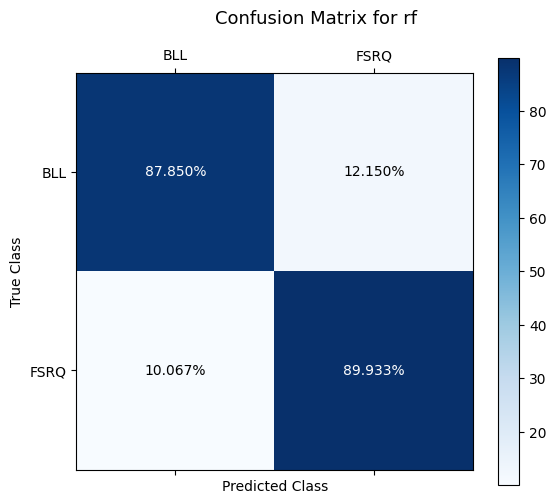

['rf',
 {'n_estimators': 77,
  'max_features': 0.351400033974538,
  'max_leaves': 31,
  'criterion': 'entropy'},
 0.9722095131425716]

In [28]:
t = 200
k_fold = 5
model_list = ['lgbm','rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1','lrl2']
ML_analysis(normalized_x_median,Y,model_list,t,k_fold)

# Another Attempt with Full Data 

Now we will run it on full data by keeping all columns. I have copied it because I want to avoid confusion.

In [38]:
location = "Selected_useful_columns_processed.csv"
data = pd.read_csv(location)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       3342 non-null   int64  
 1   Source_Name_Fermi                3342 non-null   object 
 2   Signif_Avg                       3342 non-null   float64
 3   Error Radius Counterpart_arcsec  3342 non-null   float64
 4   SpectrumType                     3342 non-null   object 
 5   Spectrum_type_encoded            3342 non-null   float64
 6   Energy_Flux100                   3342 non-null   float64
 7   PL_Index                         3342 non-null   float64
 8   LP_Index                         3342 non-null   float64
 9   PLEC_IndexS                      3321 non-null   float64
 10  Fermi_index                      3342 non-null   float64
 11  Pivot_Energy                     3342 non-null   float64
 12  HE_nuFnuPeak        

In [39]:
data = data.loc[data["Signif_Avg"]>4]  
data = data.loc[data["Error Radius Counterpart_arcsec"]<5]

data = data[['Energy_Flux100','Fermi_index','Pivot_Energy', 'nu_syn','HE_nuFnuPeak','Variability_Index', 
             'Frac_Variability', 'X-band Total','phot_g_mean_mag', 'bp_rp', 'PowFlux', 'InterpPowGamma',
               'Total_flux_VLASS','Class']]

data = data.replace(-np.inf,np.nan)

In [45]:
useful_col_pred = ["BLL","FSRQ"] # Provide the list here
data_train = data[data.iloc[:,-1].isin(useful_col_pred)]  
data_test = data[~data.iloc[:,-1].isin(useful_col_pred)]
# data_test: Completely separate since we want to predict on this


X = data_train.iloc[:,:-1]
Y = data_train.iloc[:,-1]

X_unknown = data_test.iloc[:,:-1]
Y_unknown = data_test.iloc[:,-1]

In [46]:
#Simple Imputation 1

X_columns = X.columns.tolist()           #To get column list
X_simple_median = X.copy()
#To fill empty spaces with mode:
for i in range(len(X_columns)):
    X_simple_median[X_columns[i]] = X_simple_median[X_columns[i]].fillna(X_simple_median[X_columns[i]].median()) 

    

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()
normalized_x_median = scaler.fit_transform(X_simple_median)
normalized_x_median = pd.DataFrame(normalized_x_median,columns=X.columns)

normalized_x = scaler.fit_transform(X)
normalized_x = pd.DataFrame(normalized_x,columns=X.columns)

In [48]:
#To study effect of not using radio data

normalized_x_median1 = normalized_x_median.drop(["X-band Total",'Total_flux_VLASS'], axis=1)
normalized_x1 = normalized_x.drop(["X-band Total",'Total_flux_VLASS'], axis=1)

Normalized X trained on lgbm


 
 Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 26, 'num_leaves': 16, 'min_child_samples': 11, 'learning_rate': 0.19149022094154297, 'log_max_bin': 10, 'colsample_bytree': 0.4792448891478389, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.0031811683163665244}
Best accuracy on validation data: 0.9717


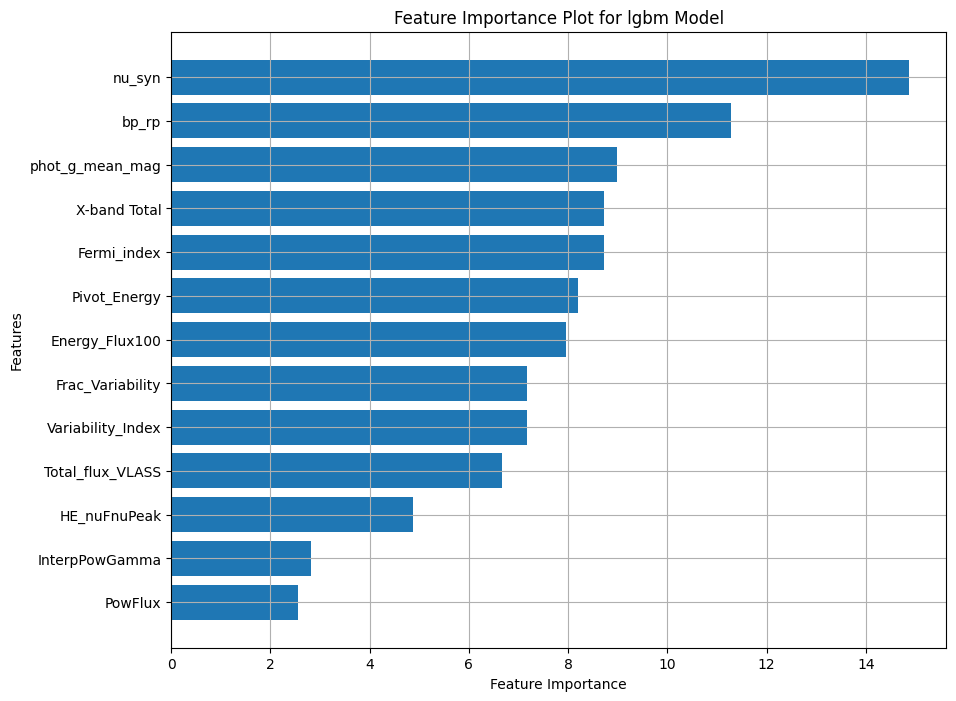

Feature: nu_syn, Importance: 0.04509
Feature: Pivot_Energy, Importance: 0.04151
Feature: X-band Total, Importance: 0.03737
Feature: bp_rp, Importance: 0.03627
Feature: Energy_Flux100, Importance: 0.01680
Feature: Fermi_index, Importance: 0.01506
Feature: Total_flux_VLASS, Importance: 0.01249
Feature: Frac_Variability, Importance: 0.01102
Feature: phot_g_mean_mag, Importance: 0.01084
Feature: PowFlux, Importance: 0.00781
Feature: InterpPowGamma, Importance: 0.00505
Feature: HE_nuFnuPeak, Importance: 0.00376
Feature: Variability_Index, Importance: -0.00009
Accuracy of model on testing data: 0.8623
Confusion Matrix:
 [[172  42]
 [  8 141]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.96      0.80      0.87       214
        FSRQ       0.77      0.95      0.85       149

    accuracy                           0.86       363
   macro avg       0.86      0.88      0.86       363
weighted avg       0.88      0.86      0.86       363



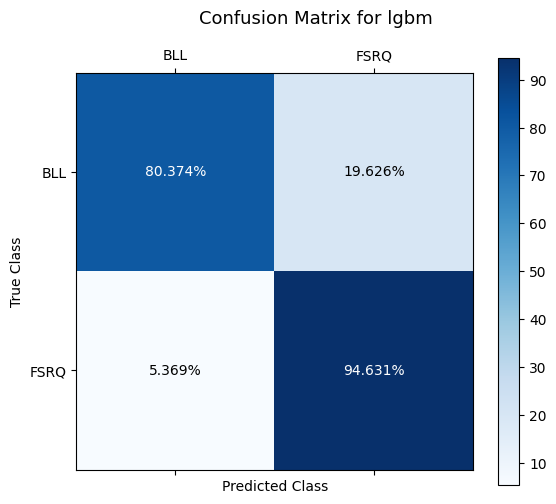

Normalized X without X-band Total trained on lgbm


 
 Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 19, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.40106881032023267, 'log_max_bin': 10, 'colsample_bytree': 0.8591464191448509, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.14586454205299842}
Best accuracy on validation data: 0.9677


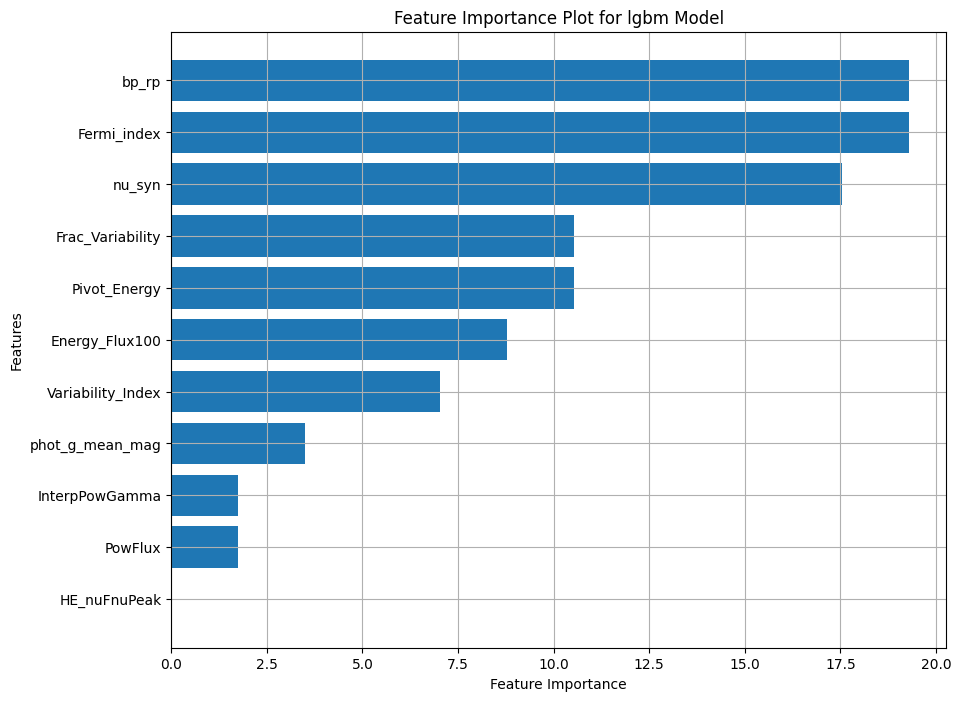

Feature: nu_syn, Importance: 0.07420
Feature: bp_rp, Importance: 0.04242
Feature: Pivot_Energy, Importance: 0.03774
Feature: Frac_Variability, Importance: 0.03343
Feature: Fermi_index, Importance: 0.02792
Feature: Energy_Flux100, Importance: 0.00386
Feature: Variability_Index, Importance: 0.00349
Feature: HE_nuFnuPeak, Importance: 0.00000
Feature: phot_g_mean_mag, Importance: -0.00101
Feature: PowFlux, Importance: -0.00432
Feature: InterpPowGamma, Importance: -0.00569
Accuracy of model on testing data: 0.8292
Confusion Matrix:
 [[166  48]
 [ 14 135]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.92      0.78      0.84       214
        FSRQ       0.74      0.91      0.81       149

    accuracy                           0.83       363
   macro avg       0.83      0.84      0.83       363
weighted avg       0.85      0.83      0.83       363



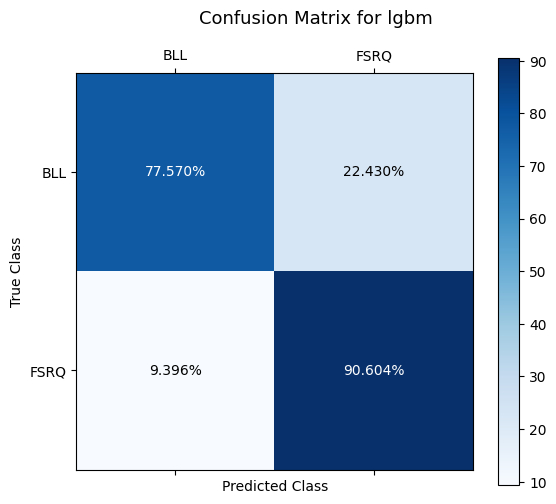

Normalized median imputed X trained on lgbm


 
 Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 26, 'num_leaves': 16, 'min_child_samples': 11, 'learning_rate': 0.19149022094154297, 'log_max_bin': 10, 'colsample_bytree': 0.4792448891478389, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.0031811683163665244}
Best accuracy on validation data: 0.9709


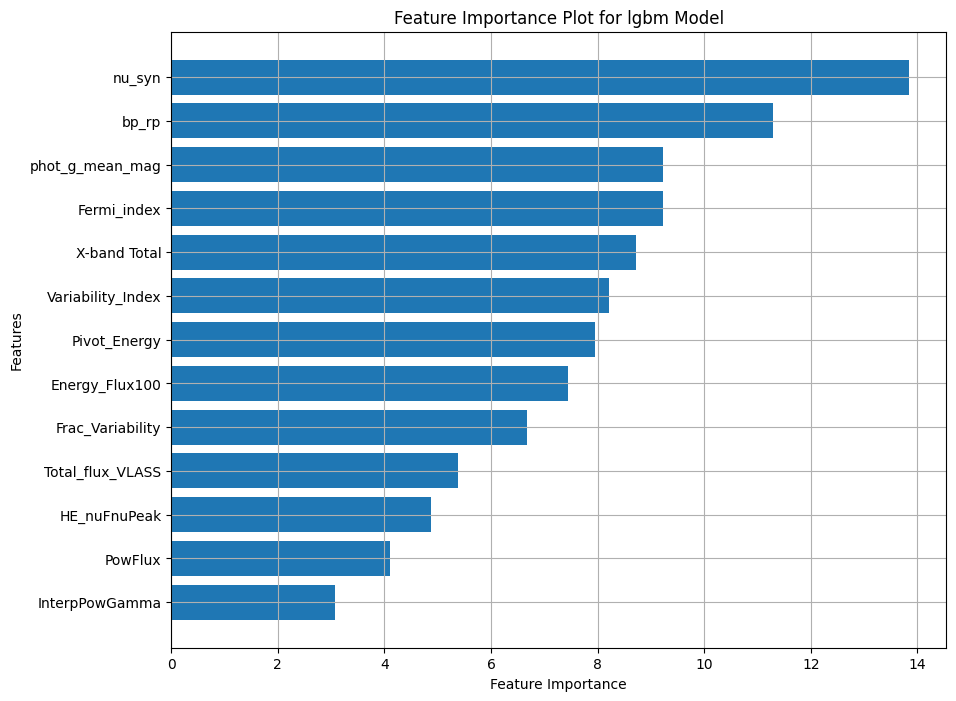

Feature: bp_rp, Importance: 0.04628
Feature: Pivot_Energy, Importance: 0.02443
Feature: nu_syn, Importance: 0.01983
Feature: Fermi_index, Importance: 0.01892
Feature: Energy_Flux100, Importance: 0.01194
Feature: X-band Total, Importance: 0.01028
Feature: phot_g_mean_mag, Importance: 0.00579
Feature: InterpPowGamma, Importance: 0.00386
Feature: HE_nuFnuPeak, Importance: 0.00340
Feature: Frac_Variability, Importance: 0.00184
Feature: Variability_Index, Importance: 0.00156
Feature: Total_flux_VLASS, Importance: -0.00092
Feature: PowFlux, Importance: -0.00376
Accuracy of model on testing data: 0.8981
Confusion Matrix:
 [[191  23]
 [ 14 135]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.93      0.89      0.91       214
        FSRQ       0.85      0.91      0.88       149

    accuracy                           0.90       363
   macro avg       0.89      0.90      0.90       363
weighted avg       0.90      0.90      0.90       363



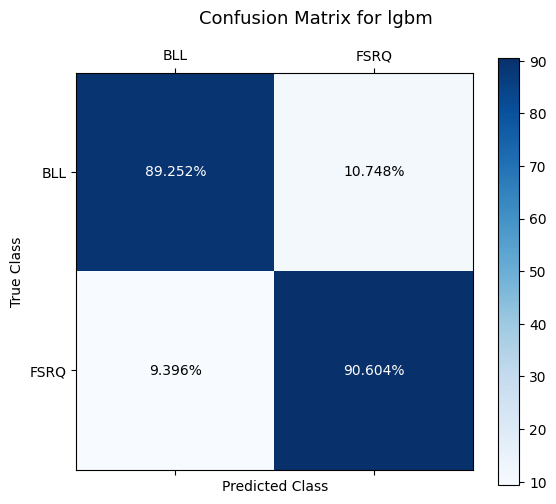

Normalized median imputed X without X-band Total trained on lgbm


 
 Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 8, 'num_leaves': 4, 'min_child_samples': 9, 'learning_rate': 0.7260594590615893, 'log_max_bin': 9, 'colsample_bytree': 0.9285002286474459, 'reg_alpha': 0.0036840681931986645, 'reg_lambda': 0.7532480505730402}
Best accuracy on validation data: 0.9626


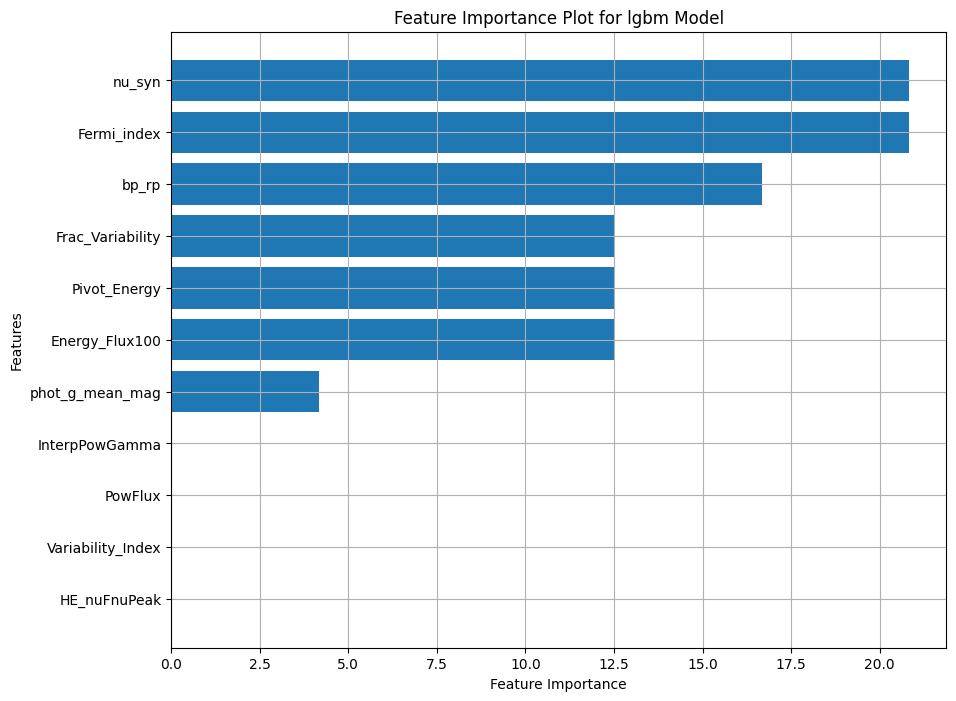

Feature: Fermi_index, Importance: 0.06171
Feature: nu_syn, Importance: 0.04821
Feature: Pivot_Energy, Importance: 0.03838
Feature: bp_rp, Importance: 0.03471
Feature: Frac_Variability, Importance: 0.01350
Feature: phot_g_mean_mag, Importance: 0.00624
Feature: Energy_Flux100, Importance: 0.00138
Feature: InterpPowGamma, Importance: 0.00000
Feature: PowFlux, Importance: 0.00000
Feature: Variability_Index, Importance: 0.00000
Feature: HE_nuFnuPeak, Importance: 0.00000
Accuracy of model on testing data: 0.8898
Confusion Matrix:
 [[191  23]
 [ 17 132]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.92      0.89      0.91       214
        FSRQ       0.85      0.89      0.87       149

    accuracy                           0.89       363
   macro avg       0.88      0.89      0.89       363
weighted avg       0.89      0.89      0.89       363



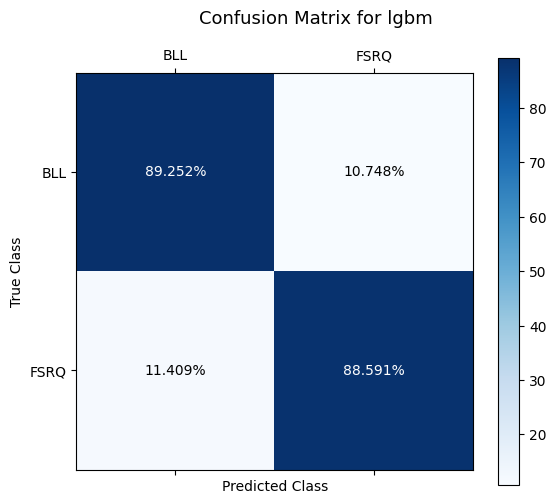

Normalized X trained on rf


 
 Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 16, 'max_features': 0.20585455833266653, 'max_leaves': 35, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9709


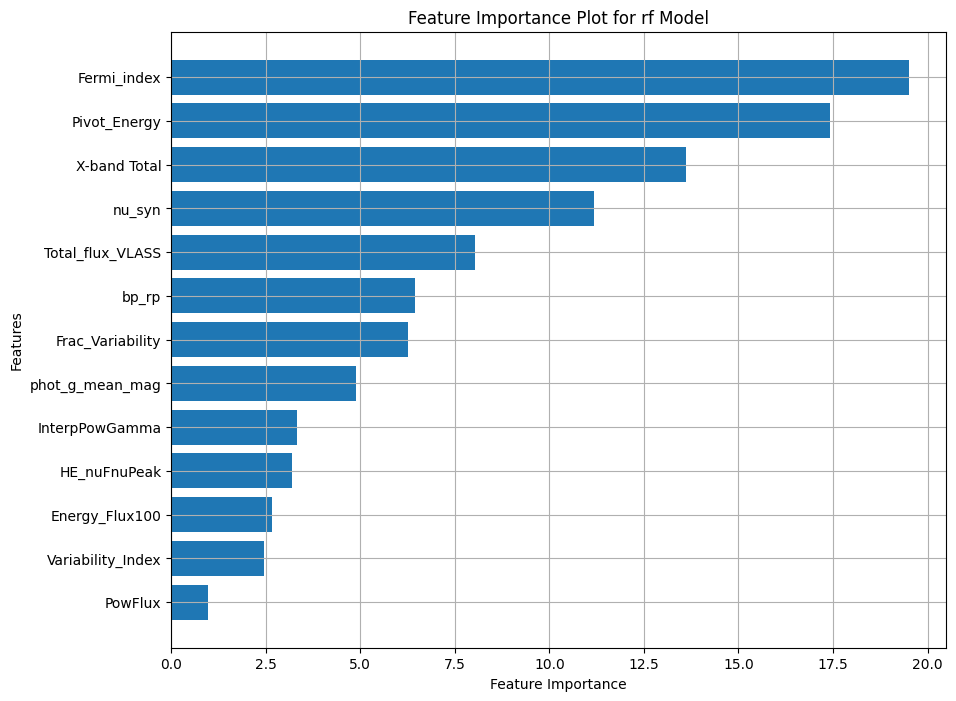

Feature: Fermi_index, Importance: 0.03398
Feature: Pivot_Energy, Importance: 0.01993
Feature: bp_rp, Importance: 0.01478
Feature: Frac_Variability, Importance: 0.00854
Feature: HE_nuFnuPeak, Importance: 0.00331
Feature: InterpPowGamma, Importance: 0.00202
Feature: phot_g_mean_mag, Importance: -0.00037
Feature: PowFlux, Importance: -0.00037
Feature: nu_syn, Importance: -0.00174
Feature: X-band Total, Importance: -0.00230
Feature: Energy_Flux100, Importance: -0.00285
Feature: Variability_Index, Importance: -0.00321
Feature: Total_flux_VLASS, Importance: -0.00661
Accuracy of model on testing data: 0.8843
Confusion Matrix:
 [[189  25]
 [ 17 132]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.92      0.88      0.90       214
        FSRQ       0.84      0.89      0.86       149

    accuracy                           0.88       363
   macro avg       0.88      0.88      0.88       363
weighted avg       0.89      0.88      0.88       36

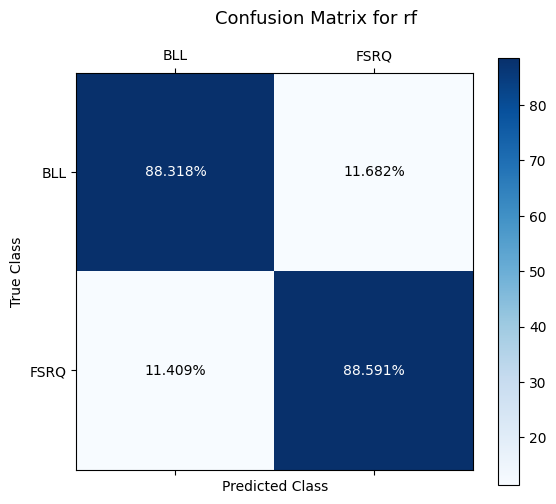

Normalized X without X-band Total trained on rf


 
 Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 51, 'max_features': 0.34435098748673193, 'max_leaves': 36, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9681


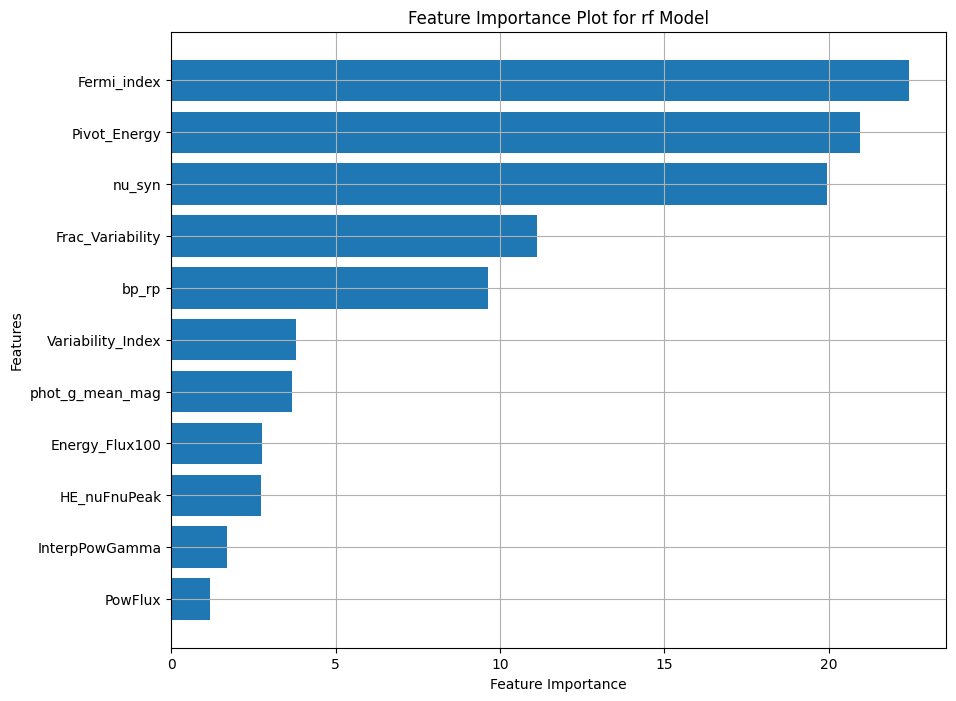

Feature: Fermi_index, Importance: 0.05592
Feature: Pivot_Energy, Importance: 0.03223
Feature: bp_rp, Importance: 0.03113
Feature: nu_syn, Importance: 0.01846
Feature: Frac_Variability, Importance: 0.01579
Feature: InterpPowGamma, Importance: 0.00588
Feature: Energy_Flux100, Importance: 0.00569
Feature: Variability_Index, Importance: 0.00358
Feature: phot_g_mean_mag, Importance: 0.00138
Feature: PowFlux, Importance: 0.00138
Feature: HE_nuFnuPeak, Importance: -0.00083
Accuracy of model on testing data: 0.8953
Confusion Matrix:
 [[190  24]
 [ 14 135]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.93      0.89      0.91       214
        FSRQ       0.85      0.91      0.88       149

    accuracy                           0.90       363
   macro avg       0.89      0.90      0.89       363
weighted avg       0.90      0.90      0.90       363



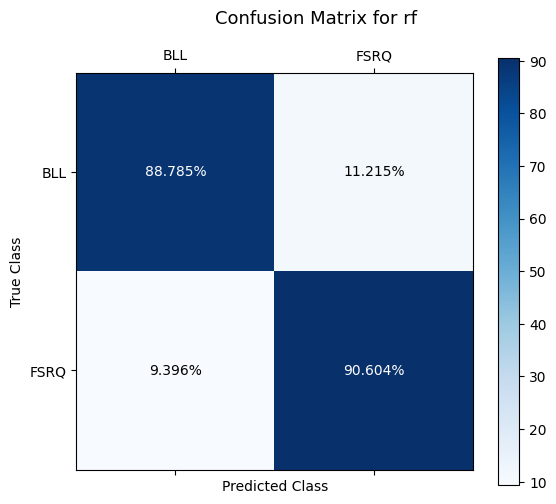

Normalized median imputed X trained on rf


 
 Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 89, 'max_features': 0.28846854847962194, 'max_leaves': 41, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9736


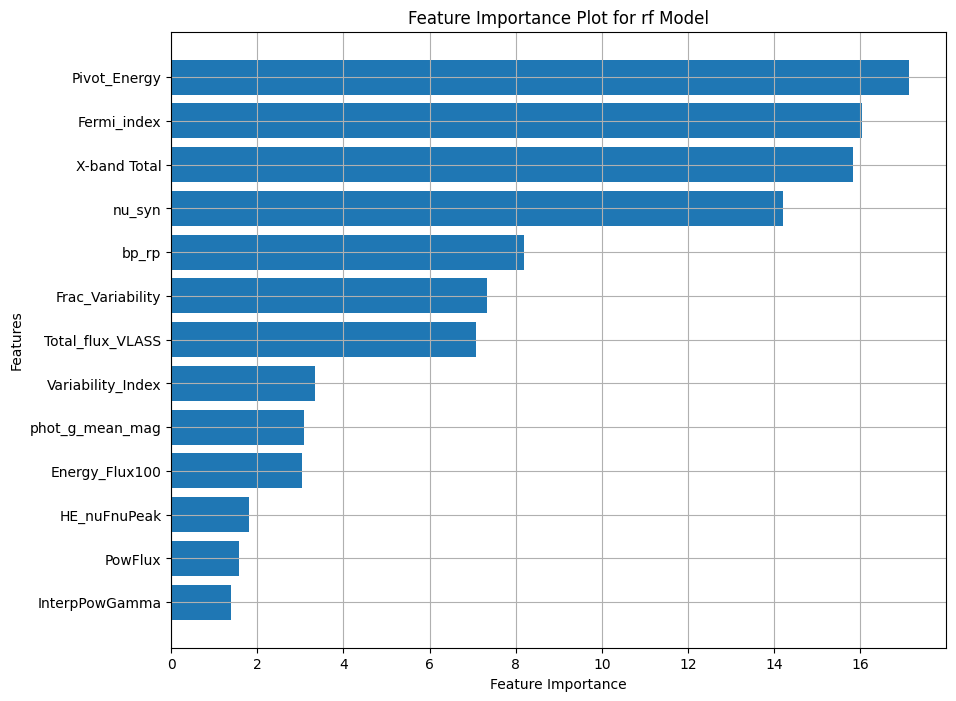

Feature: Fermi_index, Importance: 0.01818
Feature: Pivot_Energy, Importance: 0.01745
Feature: bp_rp, Importance: 0.01690
Feature: Frac_Variability, Importance: 0.00505
Feature: Variability_Index, Importance: 0.00349
Feature: HE_nuFnuPeak, Importance: 0.00211
Feature: InterpPowGamma, Importance: 0.00092
Feature: X-band Total, Importance: -0.00248
Feature: PowFlux, Importance: -0.00413
Feature: nu_syn, Importance: -0.00468
Feature: Total_flux_VLASS, Importance: -0.00634
Feature: phot_g_mean_mag, Importance: -0.00689
Feature: Energy_Flux100, Importance: -0.00973
Accuracy of model on testing data: 0.8843
Confusion Matrix:
 [[186  28]
 [ 14 135]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.93      0.87      0.90       214
        FSRQ       0.83      0.91      0.87       149

    accuracy                           0.88       363
   macro avg       0.88      0.89      0.88       363
weighted avg       0.89      0.88      0.88       363

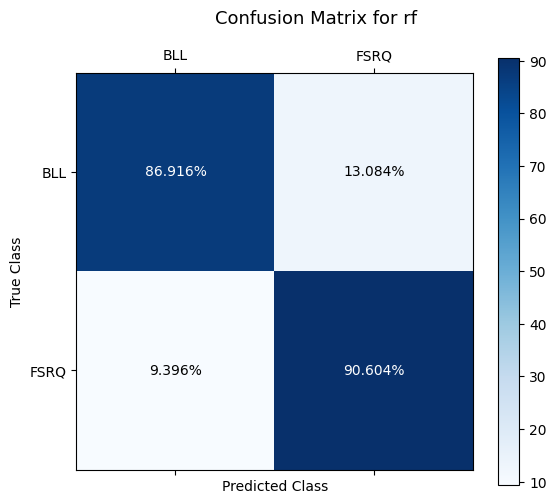

Normalized median imputed X without X-band Total trained on rf


 
 Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 92, 'max_features': 0.3429381075190565, 'max_leaves': 37, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9682


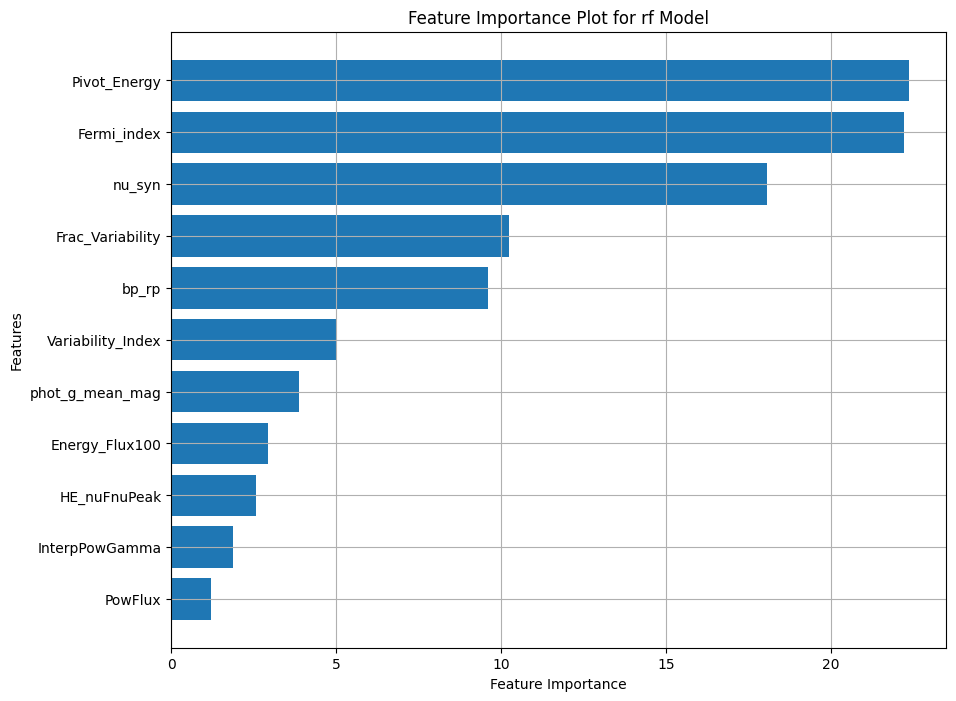

Feature: Fermi_index, Importance: 0.05142
Feature: bp_rp, Importance: 0.04224
Feature: Pivot_Energy, Importance: 0.04050
Feature: nu_syn, Importance: 0.02691
Feature: Frac_Variability, Importance: 0.01442
Feature: Energy_Flux100, Importance: 0.01038
Feature: phot_g_mean_mag, Importance: 0.00863
Feature: InterpPowGamma, Importance: 0.00643
Feature: Variability_Index, Importance: 0.00478
Feature: PowFlux, Importance: 0.00037
Feature: HE_nuFnuPeak, Importance: 0.00000
Accuracy of model on testing data: 0.9063
Confusion Matrix:
 [[193  21]
 [ 13 136]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.94      0.90      0.92       214
        FSRQ       0.87      0.91      0.89       149

    accuracy                           0.91       363
   macro avg       0.90      0.91      0.90       363
weighted avg       0.91      0.91      0.91       363



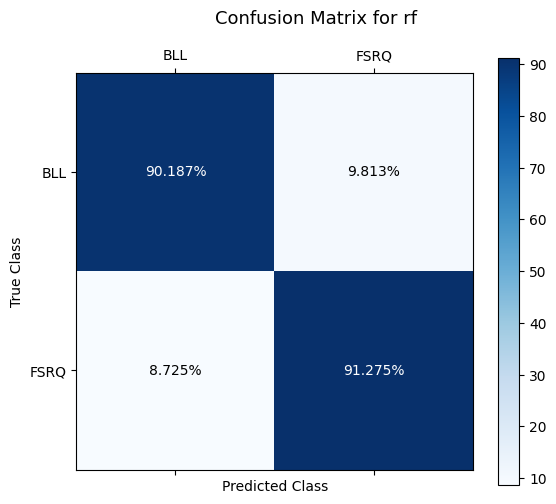

Normalized X trained on xgboost


 
 Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 9, 'max_leaves': 10, 'min_child_weight': 28.0133114672495, 'learning_rate': 0.6413547778096401, 'subsample': 1.0, 'colsample_bylevel': 0.9528676738644739, 'colsample_bytree': 0.6441597218170515, 'reg_alpha': 0.02713138226931801, 'reg_lambda': 2.178061801712075}
Best accuracy on validation data: 0.9658


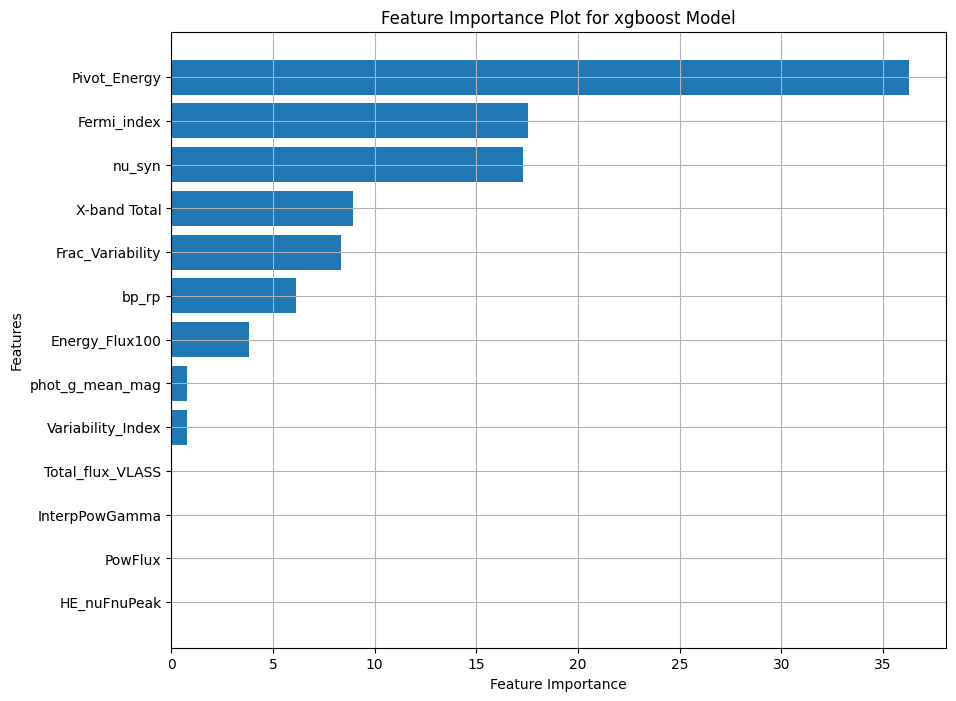

Feature: Pivot_Energy, Importance: 0.03269
Feature: X-band Total, Importance: 0.03242
Feature: bp_rp, Importance: 0.02654
Feature: Fermi_index, Importance: 0.02489
Feature: nu_syn, Importance: 0.02296
Feature: Frac_Variability, Importance: 0.02002
Feature: Variability_Index, Importance: 0.00147
Feature: Total_flux_VLASS, Importance: 0.00000
Feature: InterpPowGamma, Importance: 0.00000
Feature: PowFlux, Importance: 0.00000
Feature: HE_nuFnuPeak, Importance: 0.00000
Feature: phot_g_mean_mag, Importance: -0.00294
Feature: Energy_Flux100, Importance: -0.00450
Accuracy of model on testing data: 0.8898
Confusion Matrix:
 [[189  25]
 [ 15 134]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.93      0.88      0.90       214
        FSRQ       0.84      0.90      0.87       149

    accuracy                           0.89       363
   macro avg       0.88      0.89      0.89       363
weighted avg       0.89      0.89      0.89       363



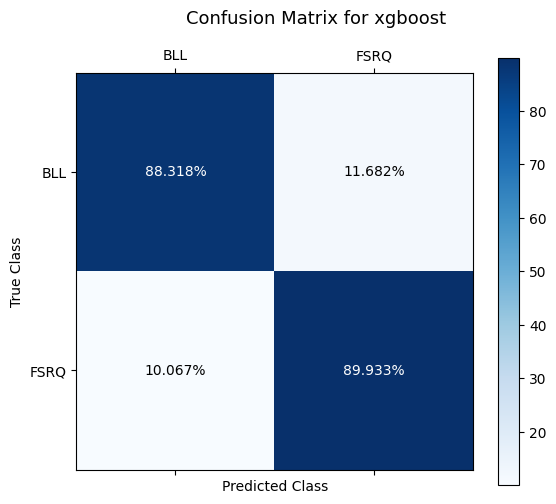

Normalized X without X-band Total trained on xgboost


 
 Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 6, 'max_leaves': 5, 'min_child_weight': 9.541722391099645, 'learning_rate': 0.6413547778096401, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.8474451618903777, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.09657442127465199}
Best accuracy on validation data: 0.9615


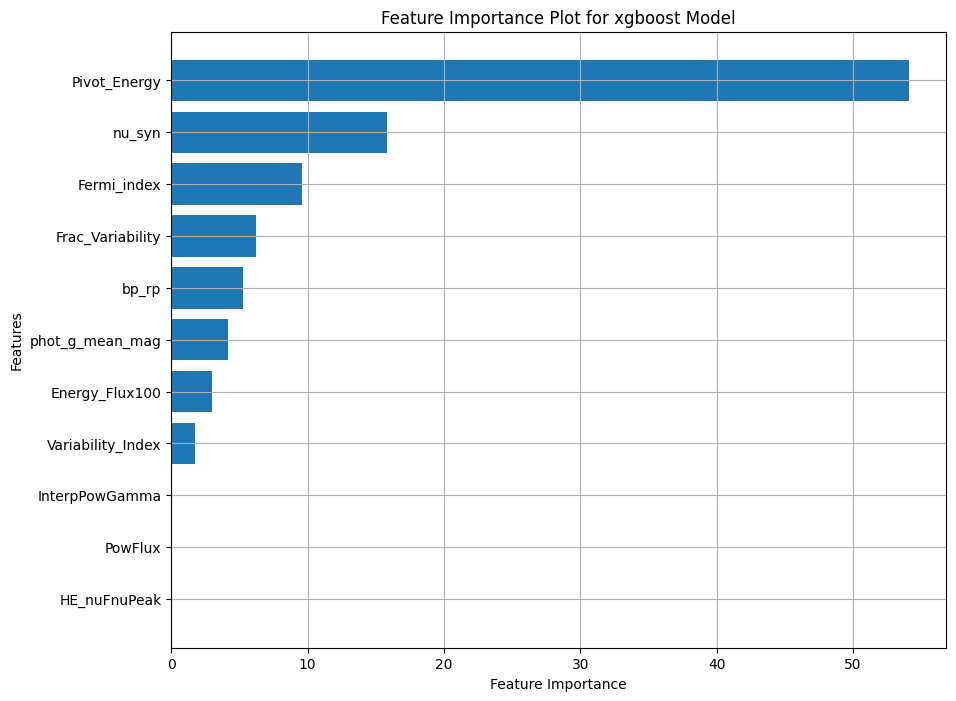

Feature: Fermi_index, Importance: 0.08457
Feature: Pivot_Energy, Importance: 0.03333
Feature: nu_syn, Importance: 0.03186
Feature: bp_rp, Importance: 0.02837
Feature: Frac_Variability, Importance: 0.00707
Feature: Energy_Flux100, Importance: 0.00367
Feature: Variability_Index, Importance: 0.00303
Feature: phot_g_mean_mag, Importance: 0.00239
Feature: InterpPowGamma, Importance: 0.00000
Feature: PowFlux, Importance: 0.00000
Feature: HE_nuFnuPeak, Importance: 0.00000
Accuracy of model on testing data: 0.8953
Confusion Matrix:
 [[191  23]
 [ 15 134]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.93      0.89      0.91       214
        FSRQ       0.85      0.90      0.88       149

    accuracy                           0.90       363
   macro avg       0.89      0.90      0.89       363
weighted avg       0.90      0.90      0.90       363



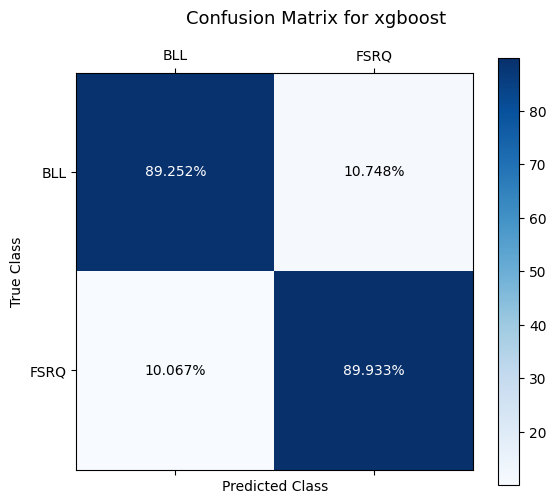

Normalized median imputed X trained on xgboost


 
 Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 28, 'max_leaves': 9, 'min_child_weight': 4.780207609176538, 'learning_rate': 0.39220715578198356, 'subsample': 1.0, 'colsample_bylevel': 0.5803009217141496, 'colsample_bytree': 0.5150660199566213, 'reg_alpha': 0.015757978341311263, 'reg_lambda': 2.057633062429468}
Best accuracy on validation data: 0.9702


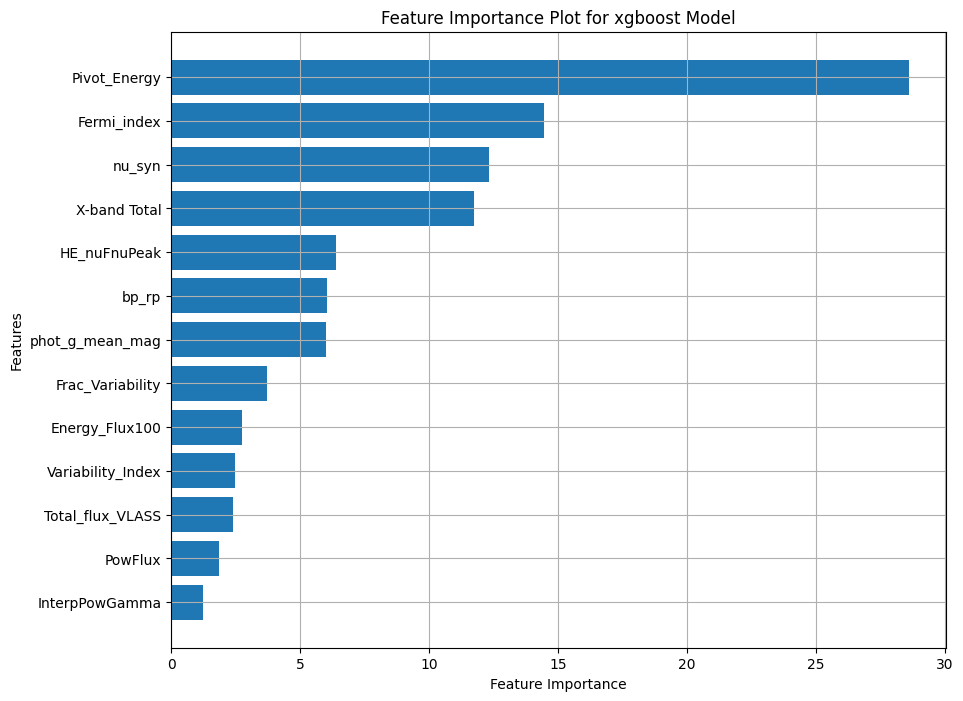

Feature: Fermi_index, Importance: 0.03453
Feature: bp_rp, Importance: 0.03379
Feature: Pivot_Energy, Importance: 0.02433
Feature: Frac_Variability, Importance: 0.01194
Feature: X-band Total, Importance: 0.01185
Feature: nu_syn, Importance: 0.00542
Feature: phot_g_mean_mag, Importance: 0.00478
Feature: Variability_Index, Importance: 0.00147
Feature: InterpPowGamma, Importance: 0.00073
Feature: Energy_Flux100, Importance: 0.00037
Feature: Total_flux_VLASS, Importance: -0.00028
Feature: HE_nuFnuPeak, Importance: -0.00294
Feature: PowFlux, Importance: -0.00496
Accuracy of model on testing data: 0.8898
Confusion Matrix:
 [[190  24]
 [ 16 133]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.92      0.89      0.90       214
        FSRQ       0.85      0.89      0.87       149

    accuracy                           0.89       363
   macro avg       0.88      0.89      0.89       363
weighted avg       0.89      0.89      0.89       363



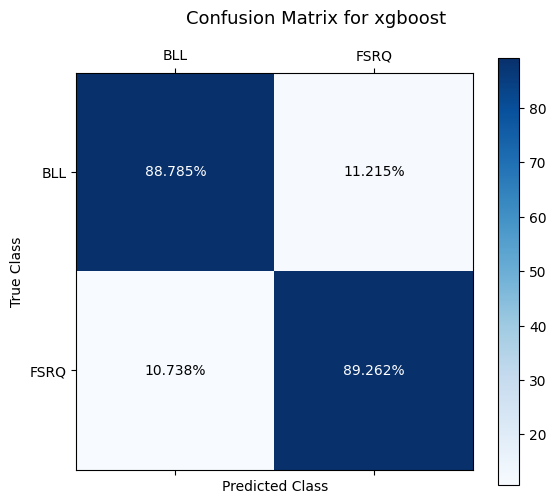

Normalized median imputed X without X-band Total trained on xgboost


 
 Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 19, 'max_leaves': 6, 'min_child_weight': 1.628205006463062, 'learning_rate': 0.39220715578198356, 'subsample': 1.0, 'colsample_bylevel': 0.6274332478496757, 'colsample_bytree': 0.7183514600299474, 'reg_alpha': 0.0017607866203119683, 'reg_lambda': 0.09123465736533065}
Best accuracy on validation data: 0.9674


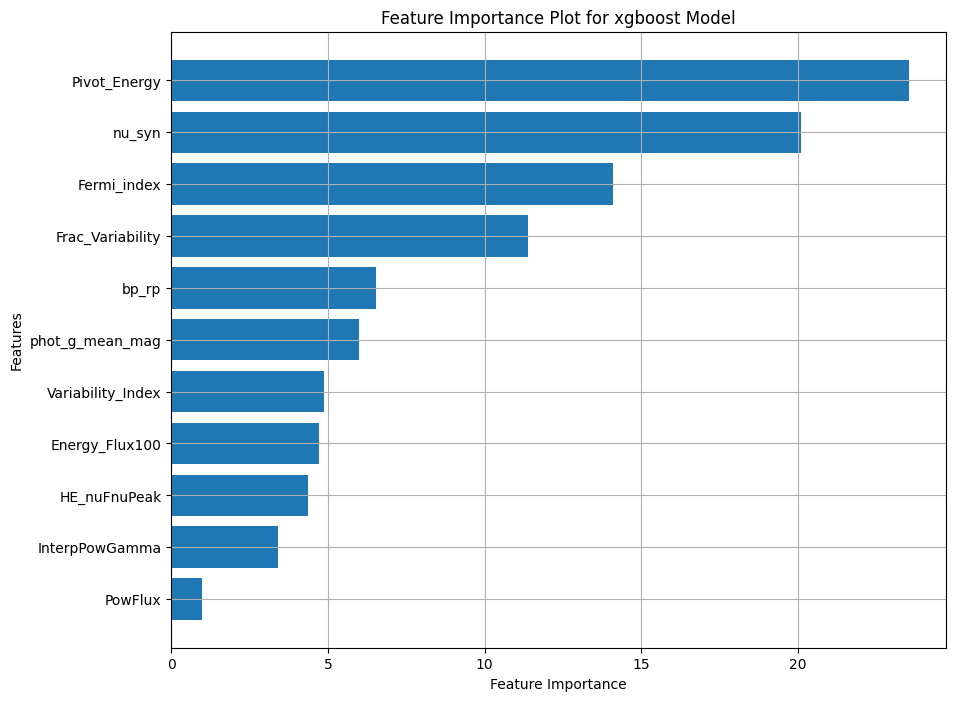

Feature: Pivot_Energy, Importance: 0.07052
Feature: bp_rp, Importance: 0.06391
Feature: Fermi_index, Importance: 0.03664
Feature: nu_syn, Importance: 0.03214
Feature: Variability_Index, Importance: 0.01267
Feature: Frac_Variability, Importance: 0.00973
Feature: InterpPowGamma, Importance: 0.00817
Feature: phot_g_mean_mag, Importance: 0.00615
Feature: PowFlux, Importance: 0.00386
Feature: HE_nuFnuPeak, Importance: 0.00129
Feature: Energy_Flux100, Importance: -0.00101
Accuracy of model on testing data: 0.9063
Confusion Matrix:
 [[192  22]
 [ 12 137]]

Classification Report:
               precision    recall  f1-score   support

         BLL       0.94      0.90      0.92       214
        FSRQ       0.86      0.92      0.89       149

    accuracy                           0.91       363
   macro avg       0.90      0.91      0.90       363
weighted avg       0.91      0.91      0.91       363



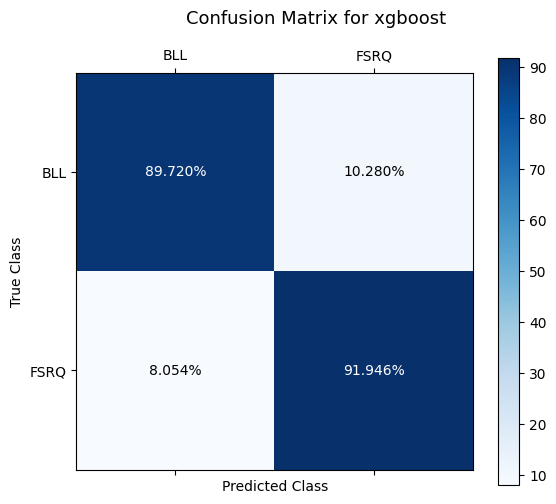

In [49]:
list_of_X = [normalized_x,normalized_x1,normalized_x_median,normalized_x_median1] 
list_of_methods_X = ["Normalized X","Normalized X without X-band Total",
                     "Normalized median imputed X","Normalized median imputed X without X-band Total"]
t = 100
k_fold = 5
model_list = ['lgbm','rf','xgboost']
for model in model_list:
    for i in range(len(list_of_X)):
        print(list_of_methods_X[i]+" trained on "+model+"\n")
        ML_analysis(list_of_X[i],Y,[model],t,k_fold)